In [51]:


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import pchip_interpolate, CloughTocher2DInterpolator, RectBivariateSpline
import scipy.stats as stats
from datetime import datetime, timedelta


plt.style.use('./custom_latex_style.mplstyle')

Oppgave 0

In [2]:
 # Read the data with panda and transform them into nmupy array 
# Load the data using pandas
data = pd.read_csv('NORA10_5674N_0501E.txt', header=3, sep='\s+')

# Function to create a datetime from row data
def create_datetime(row):
    return pd.Timestamp(year=int(row[0]), month=int(row[1]), day=int(row[2]), hour=int(row[3]))

# Extract start and end times from the data
start_time = create_datetime(data.iloc[0])
end_time = create_datetime(data.iloc[-1])

# Create a time range
time= pd.date_range(start=start_time, end=end_time, freq='3H')


# Time steps in hours
time_step = 3
dt= time_step
num_points = len(time)
t = np.linspace(0, (num_points - 1) * time_step, num_points)

# Extract specific columns
oldU = data.iloc[:, 8:13]
oldDir = data.iloc[:, 13:16]

# Print the original data
print(data)


        YEAR   M   D   H    MSLP   T2m  RH2m   RR   W10   W50  ...    TP   TM  \
0       1957   9   1   6  1013.8  13.0  76.6  0.0   5.3   5.5  ...   5.2  4.5   
1       1957   9   1   9  1013.4  13.6  74.4  0.0   5.1   5.4  ...   5.2  4.6   
2       1957   9   1  12  1012.9  13.7  76.3  0.0   3.3   3.5  ...   5.2  4.7   
3       1957   9   1  15  1012.5  14.5  80.3  0.1   2.5   2.8  ...   5.2  4.7   
4       1957   9   1  18  1012.0  14.1  78.9  0.0   4.1   4.4  ...   5.2  4.7   
...      ...  ..  ..  ..     ...   ...   ...  ...   ...   ...  ...   ...  ...   
187728  2021  11  30   6   995.9   6.6  66.2  0.2  18.4  20.8  ...  10.2  7.8   
187729  2021  11  30   9   998.2   6.7  61.3  0.4  16.2  18.2  ...  10.2  8.1   
187730  2021  11  30  12   999.7   6.5  64.6  0.2  12.7  14.0  ...  11.2  8.0   
187731  2021  11  30  15  1000.2   6.6  56.9  0.1   8.1   8.7  ...  11.2  7.7   
187732  2021  11  30  18   999.6   6.1  56.8  0.0   4.5   4.8  ...  11.2  7.9   

         DIRP   DIRM  HS.1 

Oppgave 1

In [3]:
# We use the DTU 10 MW wind turbine with the hub heught of 119 m
zHub =  119 # hub height

oldZ = np.array([10, 50,80,100,150 ])
oldZ_dir = np.array([10,100,150])
newZ = np.sort(np.array([10, 50,80,100,zHub,150 ])) # new vector z with hub height
indZ = np.argmin(np.abs(newZ-zHub)) # hub height



oppgave 2

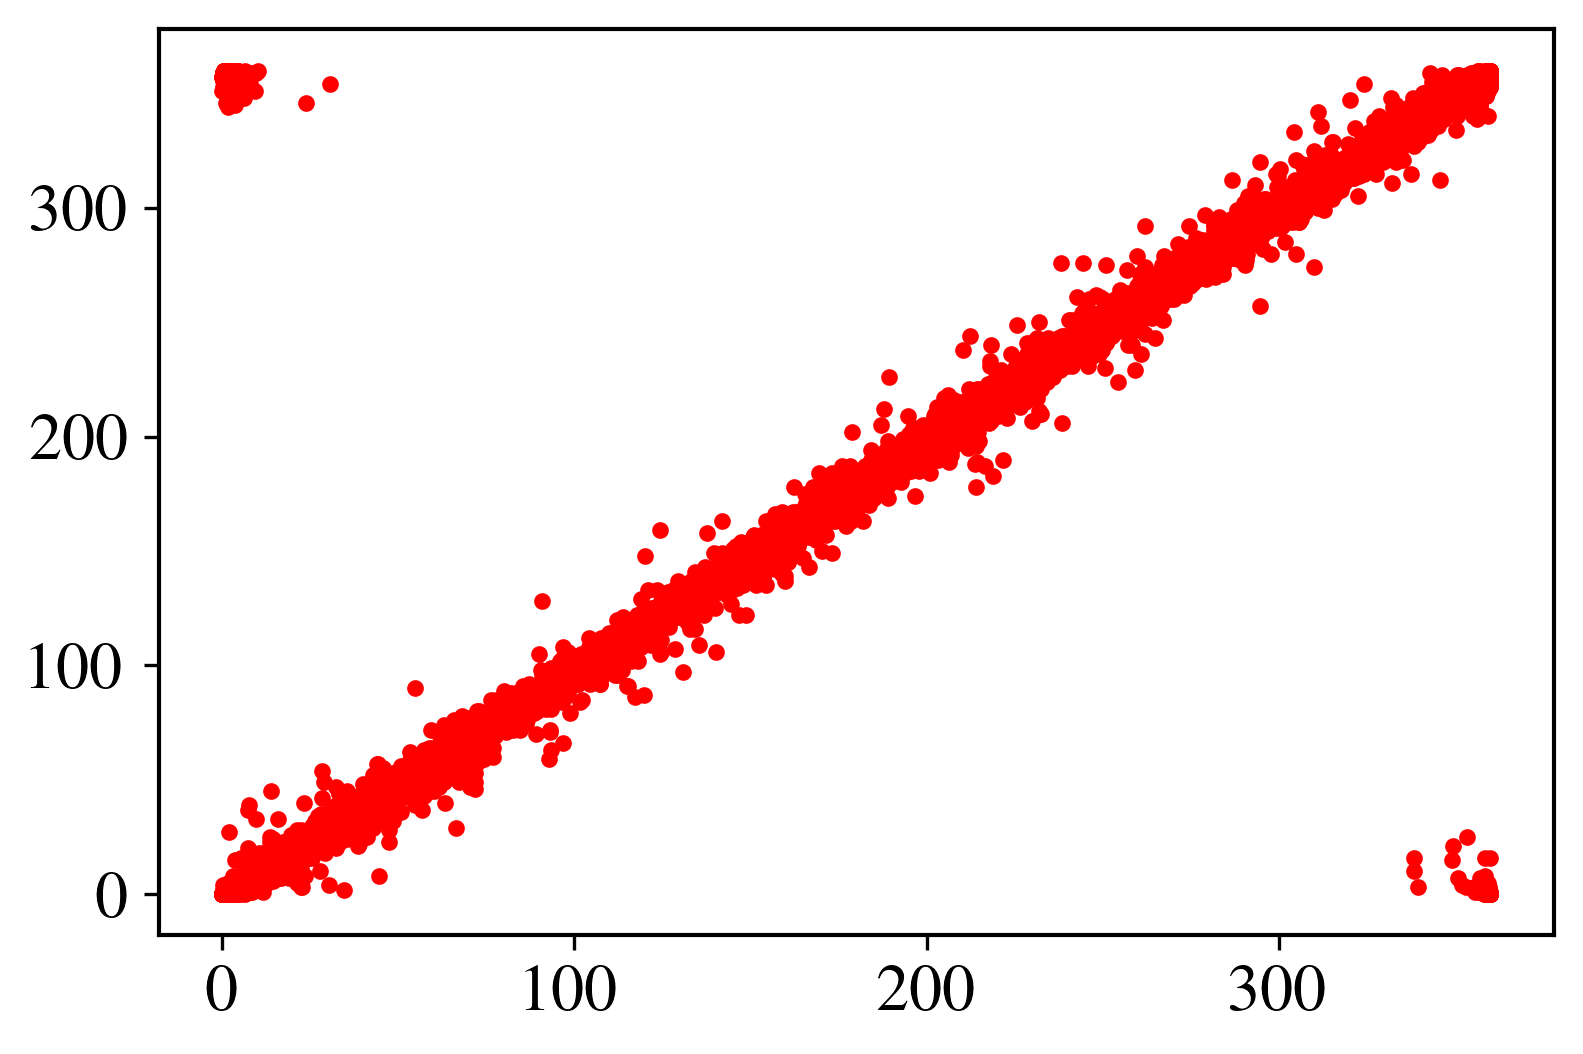

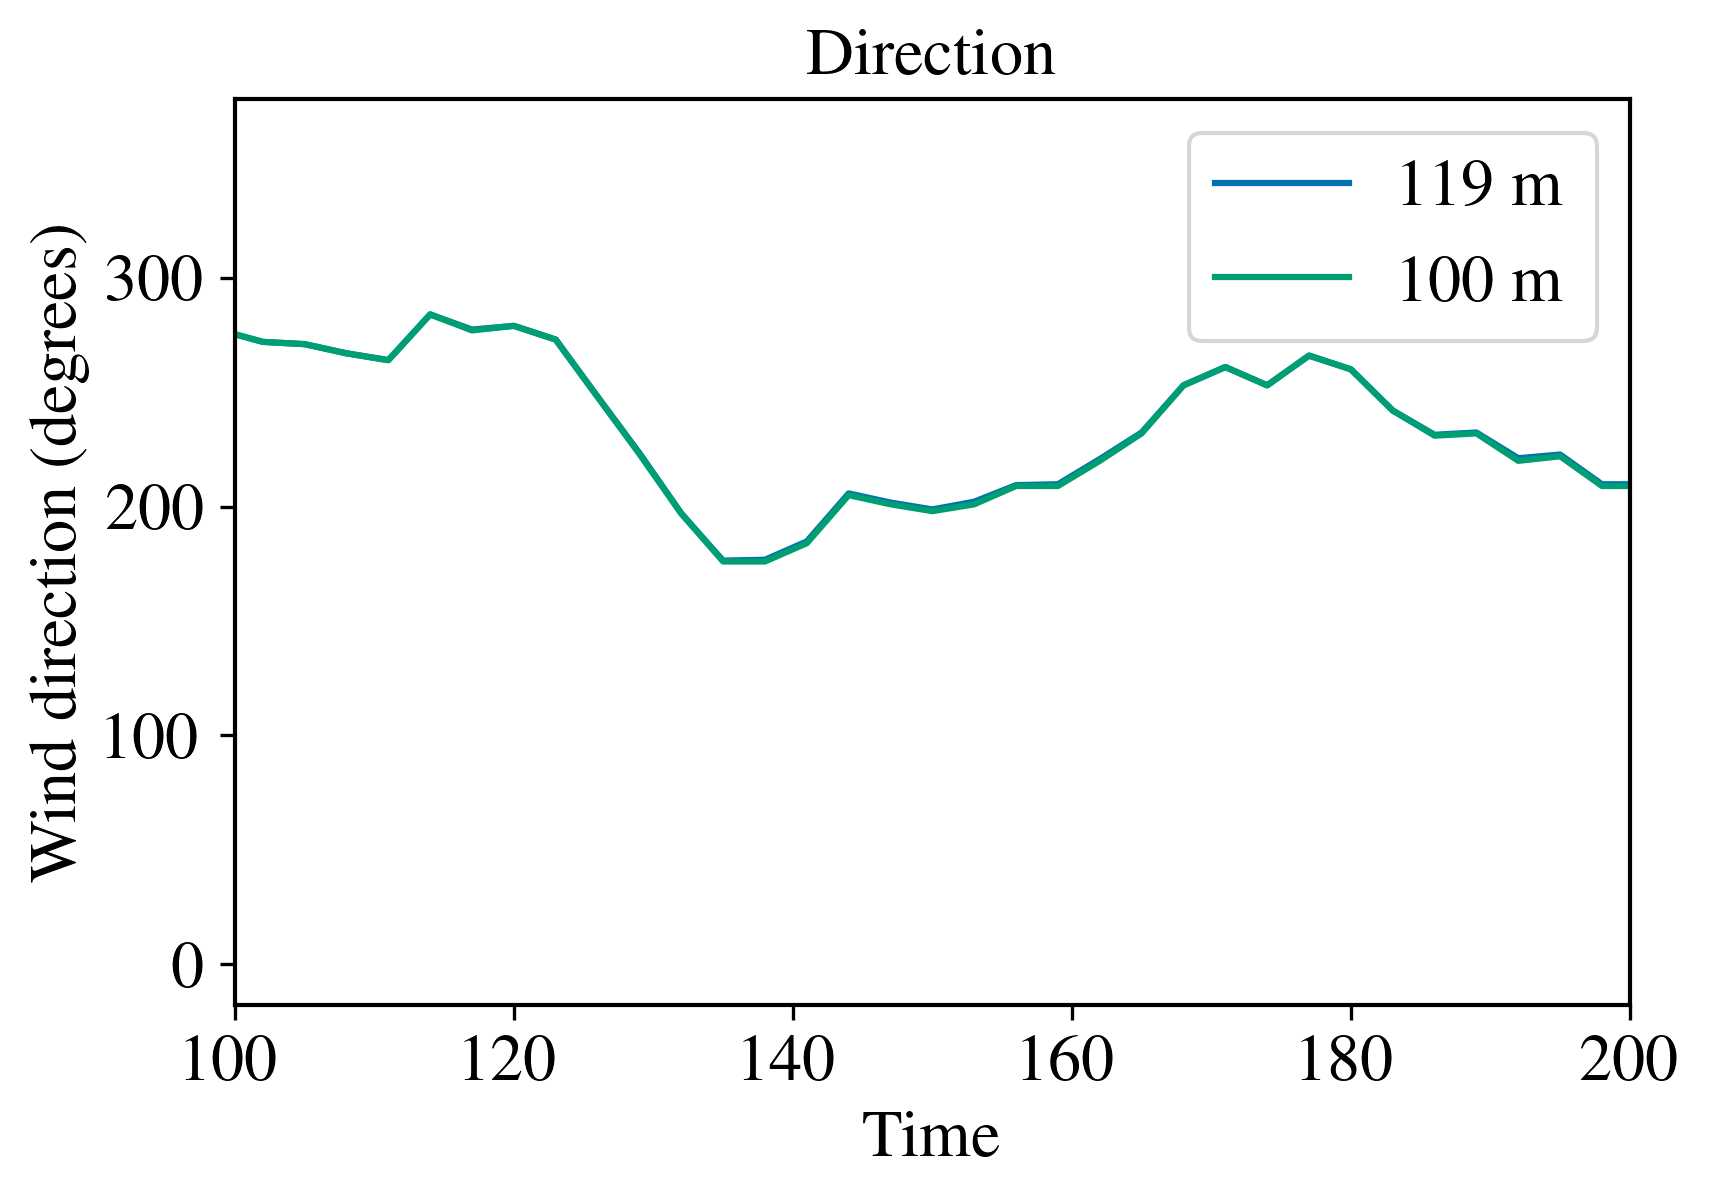

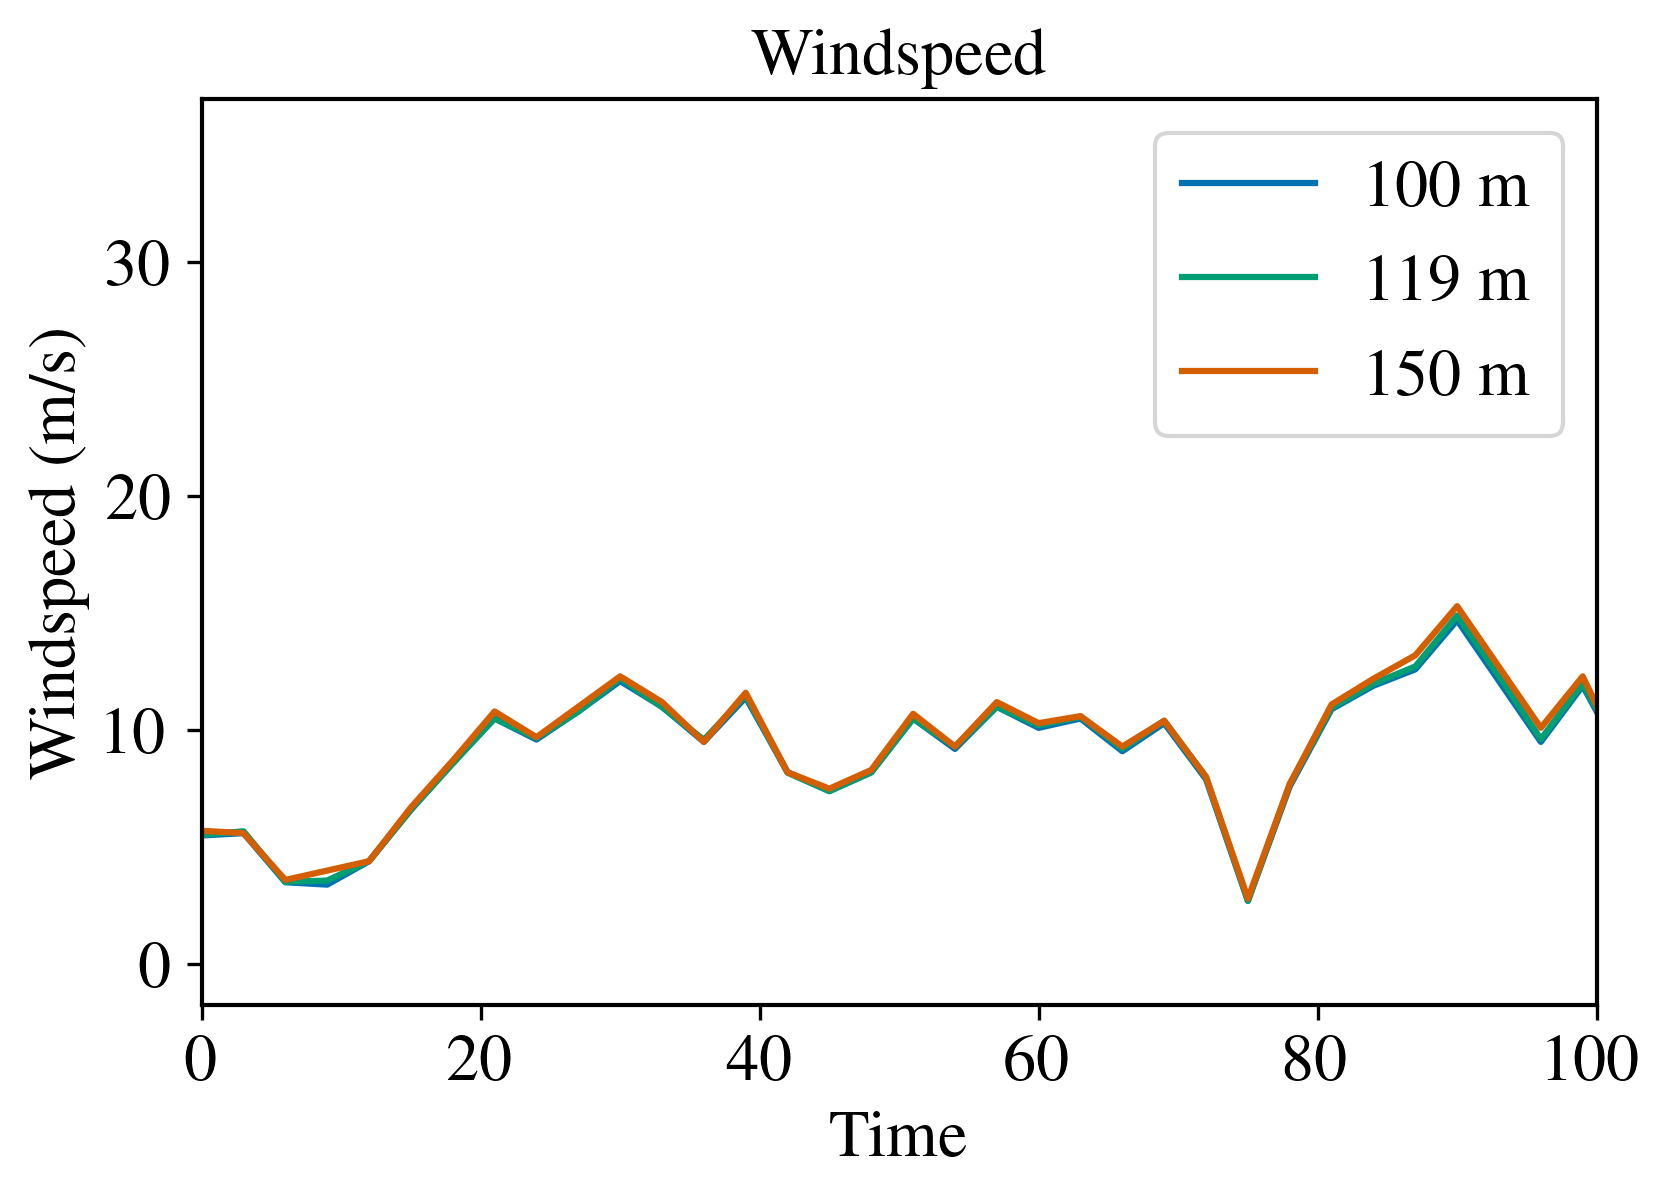

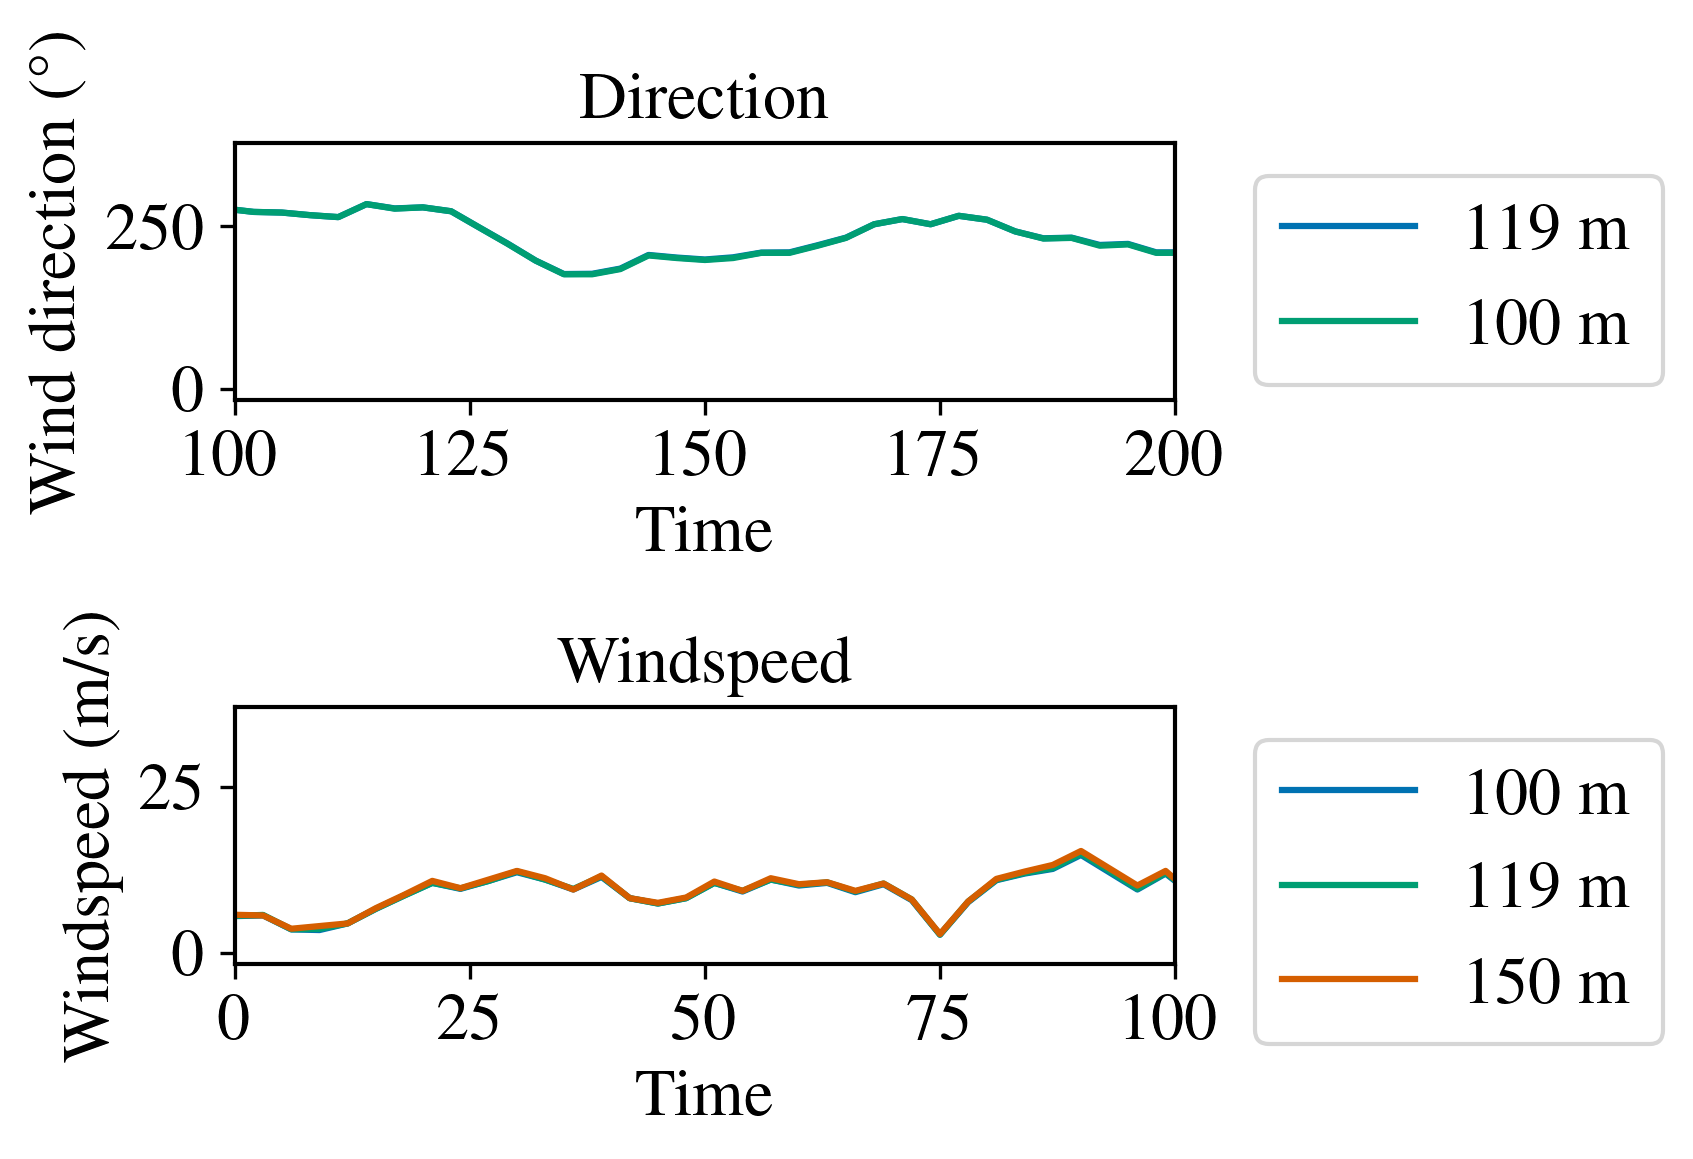

In [56]:
# Generate the interpolator object f
f = RectBivariateSpline(t,oldZ,oldU)
# Interpolate on the new vector Z
newU = f(t,newZ);
newU[newU<0] = 0

# For the wind direction, spliot into 2 components Vx and Vy
oldVx = np.cos(oldDir*np.pi/180) 
oldVy = np.sin(oldDir*np.pi/180)

f = RectBivariateSpline(t,oldZ_dir,oldVx,ky=1)
newVx = f(t,newZ);

f = RectBivariateSpline(t,oldZ_dir,oldVy,ky=1)
newVy = f(t,newZ);


newDir = np.arctan2(newVy,newVx)*180/np.pi
newDir[newDir<0] = newDir[newDir<0]  + 360
 
plt.plot(newDir[:,indZ],oldDir.iloc[:,1],'r.')
plt.savefig("Interpolation.pdf", bbox_inches='tight')

# Plot the time series at Hub height to check that the interpolation is OK

fig = plt.figure()
plt.plot(t,newDir[:,indZ])
plt.plot(t,oldDir.iloc[:, 1])
plt.xlim(100,200)
plt.xlabel("Time")
plt.ylabel("Wind direction (degrees)")  
plt.legend(['119 m','100 m'])
plt.title("Direction")
plt.savefig("Wind_direction.pdf", bbox_inches='tight')


fig = plt.figure()
plt.plot(t,newU[:,[indZ-1, indZ, indZ+1]])
plt.xlim(0,100)       
plt.xlabel("Time")
plt.ylabel("Windspeed (m/s)")           
plt.legend(['100 m','119 m','150 m'])
plt.title("Windspeed")
plt.savefig("Wind_speed.pdf")

fig, axes = plt.subplots(nrows=2, ncols=1)

axes[0].plot(t, newDir[:, indZ], label='119 m')
axes[0].plot(t, oldDir.iloc[:, 1], label='100 m')
axes[0].set_xlim(100, 200)
axes[0].set_xlabel("Time")
axes[0].set_ylabel("Wind direction (\u00b0)")
axes[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
axes[0].set_title("Direction")

# Plotting Wind Speed
axes[1].plot(t, newU[:, [indZ - 1, indZ, indZ + 1]])
axes[1].set_xlim(0, 100)
axes[1].set_xlabel("Time")
axes[1].set_ylabel("Windspeed (m/s)")
axes[1].legend(['100 m', '119 m', '150 m'], bbox_to_anchor=(1.05, 1), loc='upper left')
axes[1].set_title("Windspeed")

# Adjust layout and save the figure
plt.tight_layout()
plt.savefig("Wind_subplot.pdf", bbox_inches='tight')
plt.show()




Oppgave3

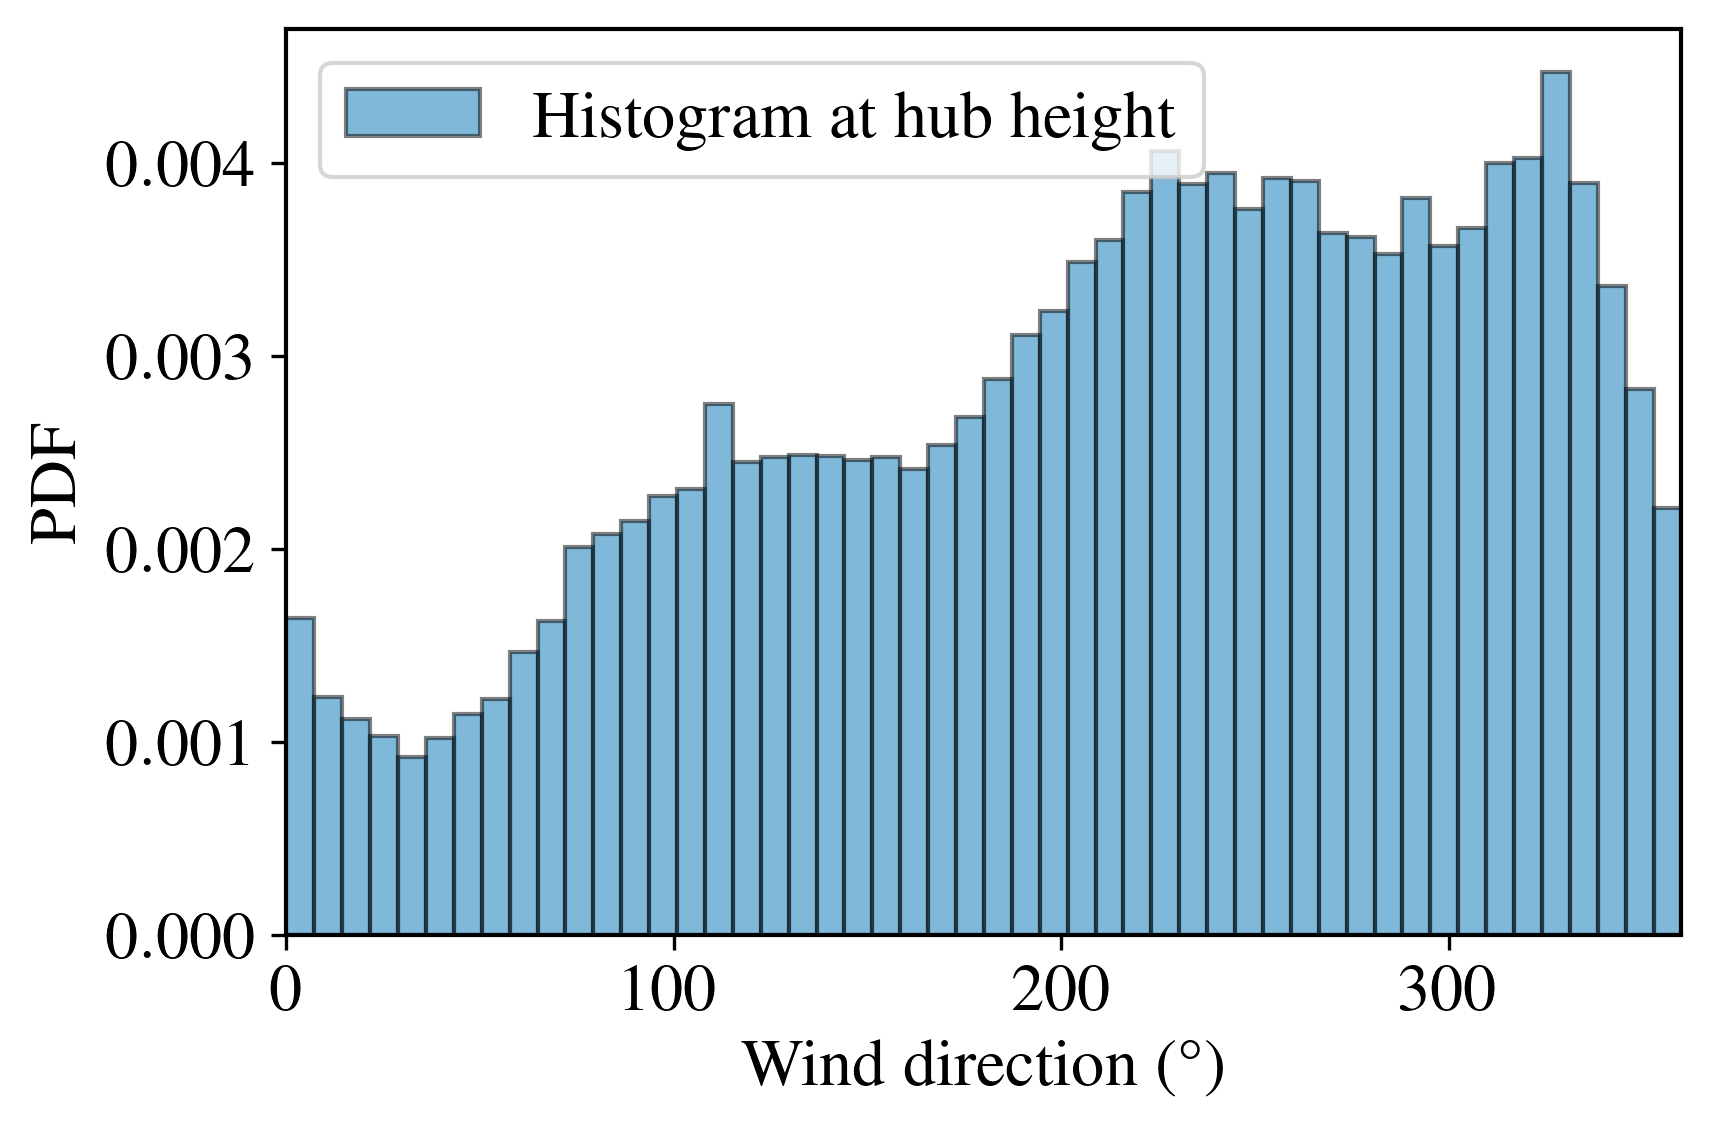

In [57]:
plt.hist(newDir[:,indZ], bins=50,label = 'Histogram at hub height',
         density=True, alpha=0.5,edgecolor='black')
plt.xlim([0,360]) 
plt.legend()
plt.xlabel("Wind direction (\u00b0)", usetex=True)
plt.ylabel("PDF")
plt.savefig("Histogram_Wind_direction.pdf", bbox_inches='tight')


a =  2.3  and b =  12.0 


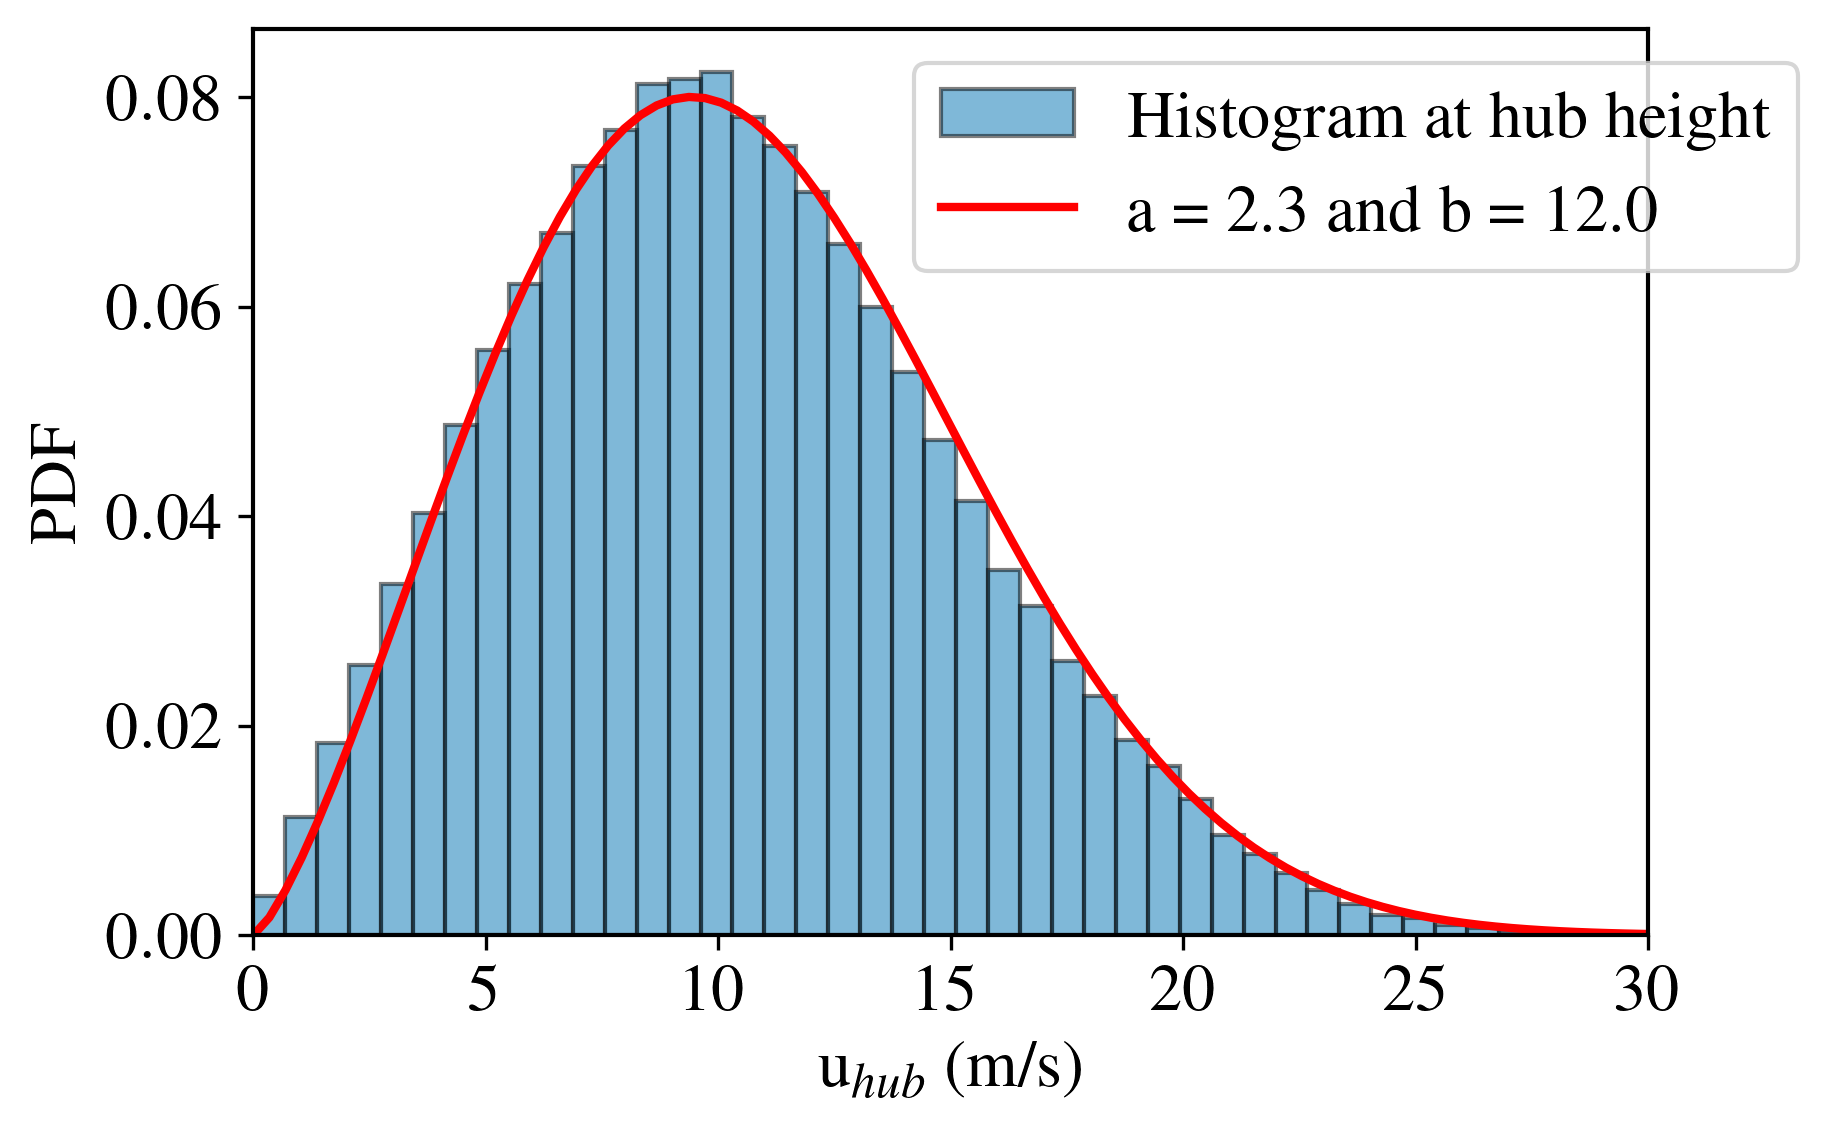

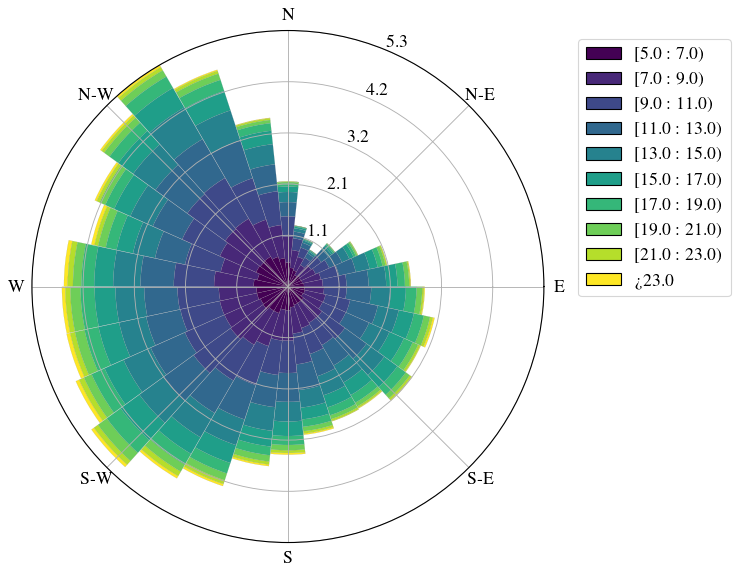

In [26]:
#  Distribution of mean wind speed
# For with the 2-para Weibull distribution
from scipy.stats import weibull_min

params = stats.exponweib.fit(newU[:,indZ], loc=0, f0=1)
a = params[1]
b = params[3]
u = np.linspace(np.min(newU[:,indZ]),np.max(newU[:,indZ]),100)
myPDF = weibull_min.pdf(u, a,scale = b)
print("a =  {:.1f}  and b =  {:.1f} ".format(a,b))

# Plot the pdf for all sector

mylabel="a =  {:.1f}  and b =  {:.1f} ".format(a,b)

fig = plt.figure()
plt.hist(newU[:,indZ], bins=50,label = 'Histogram at hub height',
         density=True, alpha=0.5,edgecolor='black')
plt.plot(u, myPDF, linewidth=2, label = mylabel ,color='r')
plt.xlim([0,30]) 
plt.legend(bbox_to_anchor=(0.45, 1), loc='upper left')
plt.xlabel("u$_{hub}$ (m/s)", usetex=True)
plt.ylabel("PDF")
plt.savefig("Histogram.pdf", bbox_inches='tight')


# Wind rose

from windrose import WindroseAxes
ax = WindroseAxes.from_ax()
dummyU = newU[:,indZ];
D = newDir[:,indZ]
D = D[dummyU>5]
dummyU = dummyU[dummyU>5]

ax.bar(D,dummyU, nsector= 30,opening=0.99, 
       bins=np.arange(5, 25, 2),edgecolor='gray',lw=0.1, normed=True)
ax.set_theta_zero_location('W', offset=-180)
#plt.legend(loc="upper right")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.savefig("Windrose.pdf", bbox_inches='tight')
plt.show()





oppgave 4

a =  2.2  and b =  10.9 
a =  2.5  and b =  12.7 
a =  2.5  and b =  12.5 
a =  2.3  and b =  12.1 


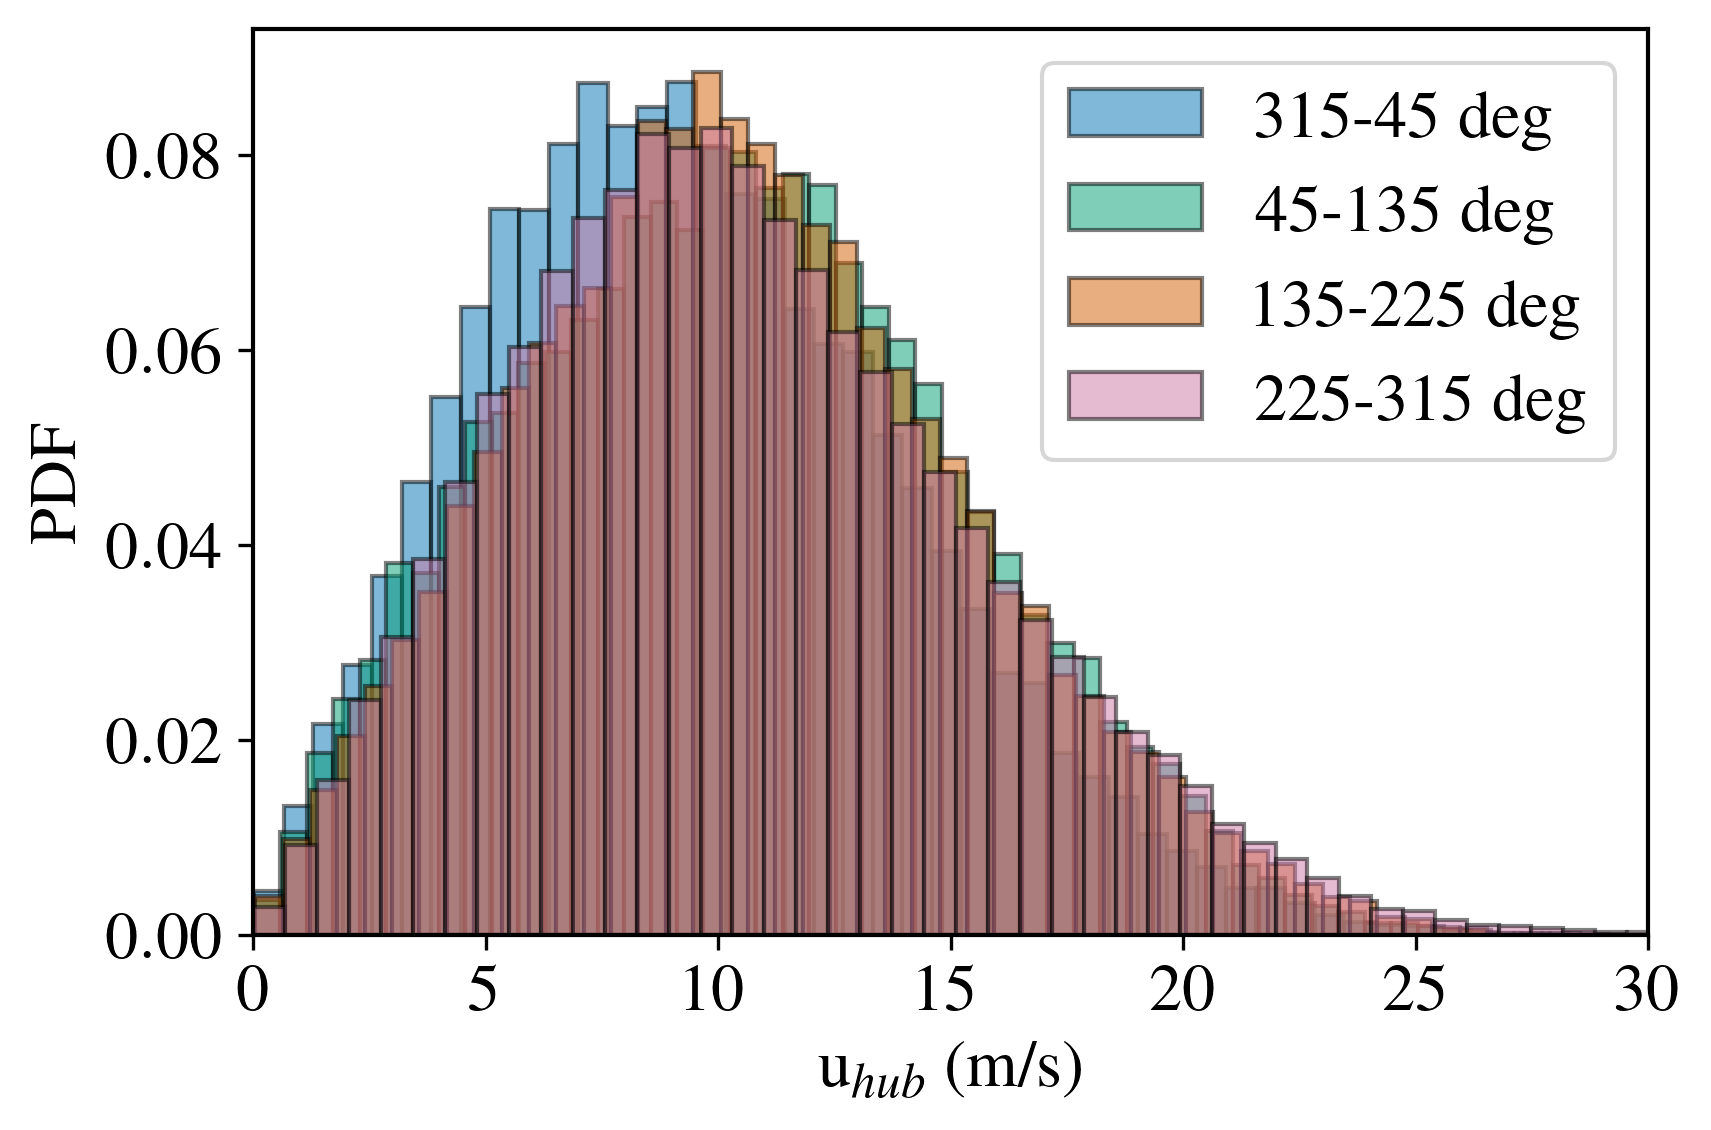

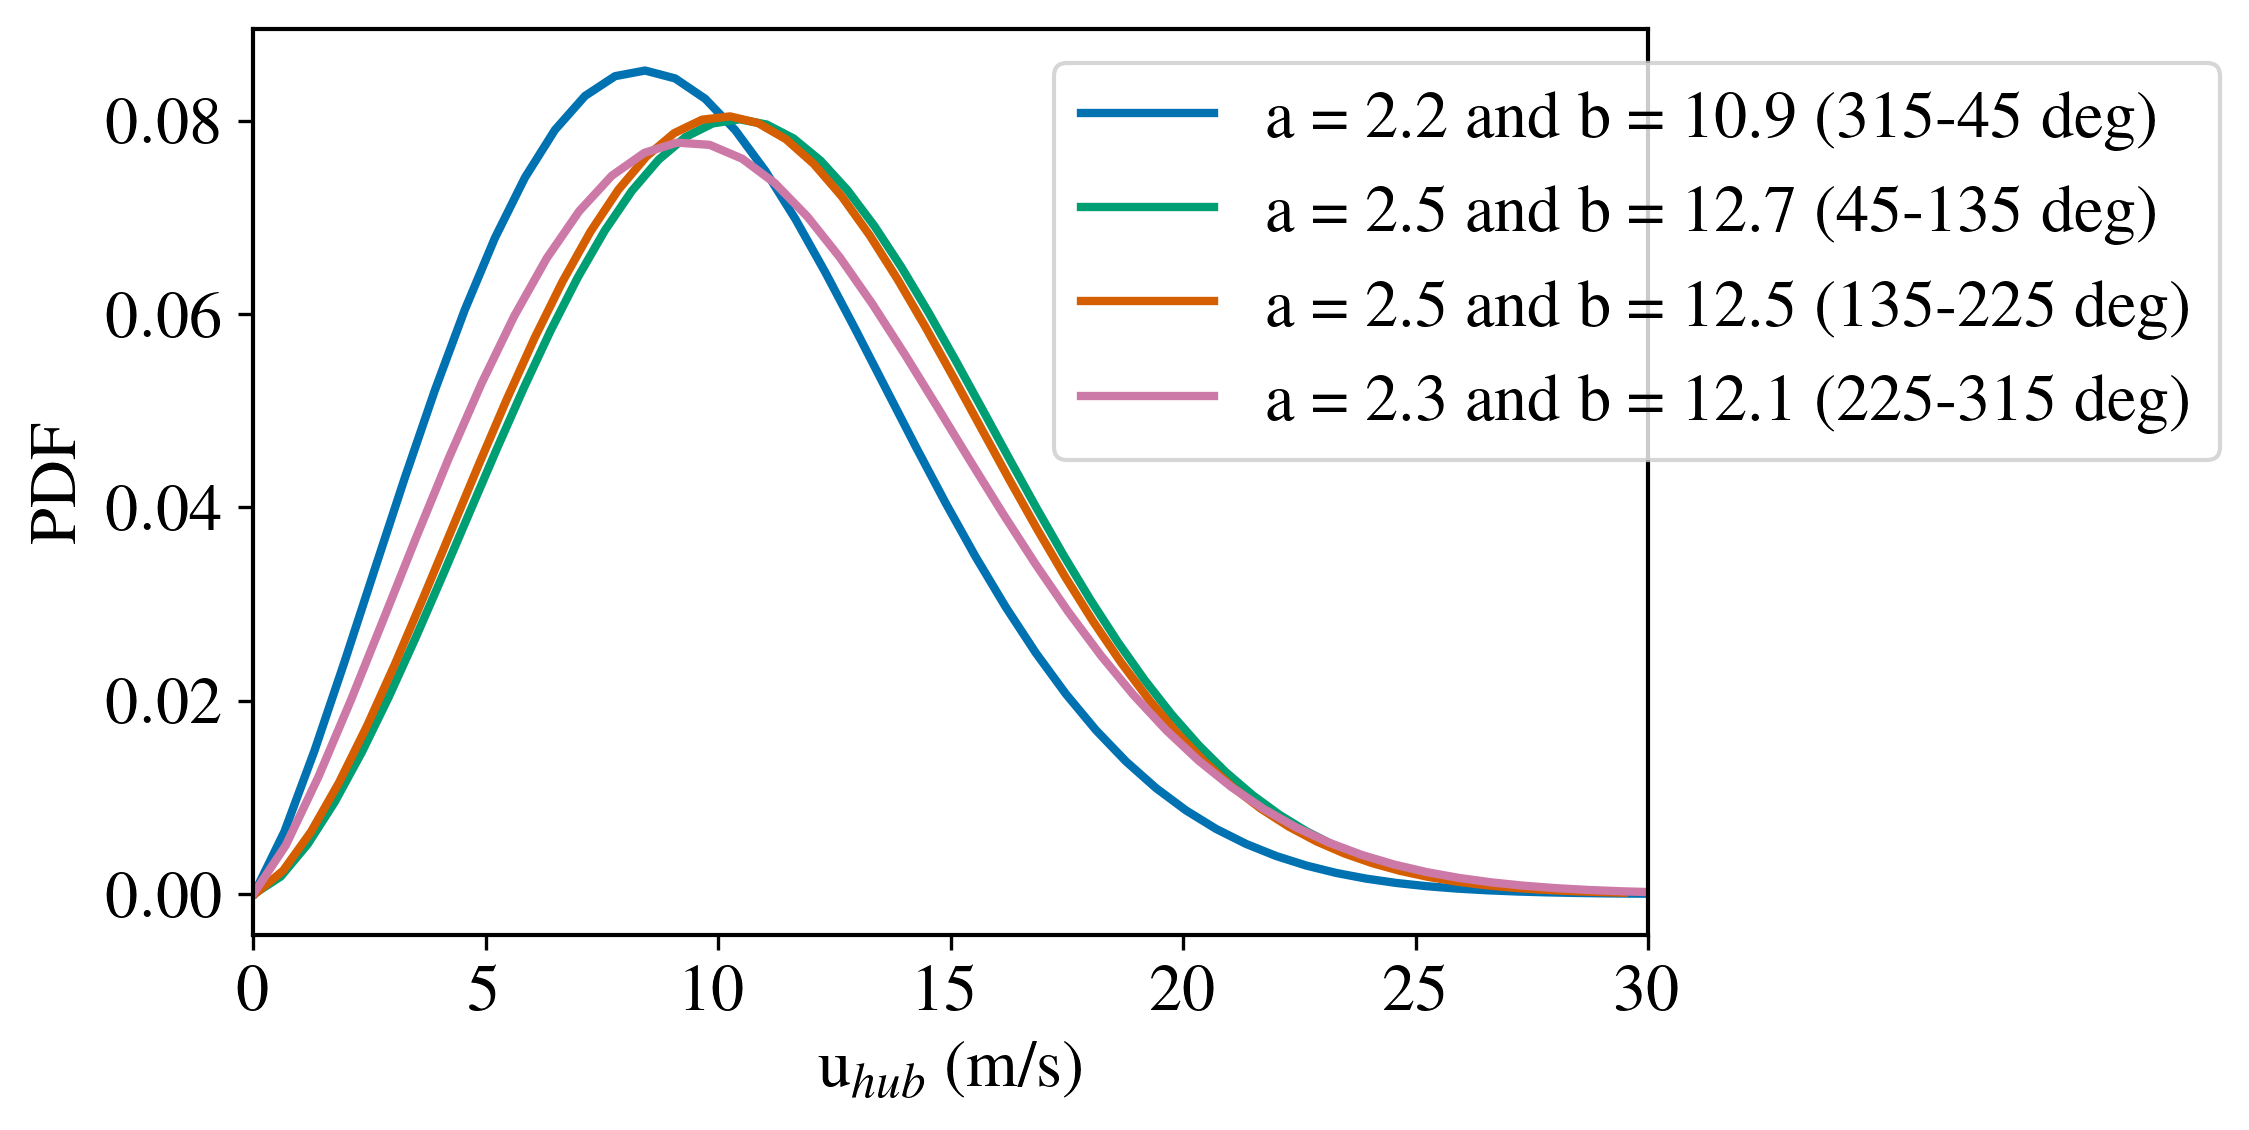

In [7]:
# Weibull fir for the four sectors requested

d = newDir[:,indZ]
indDir=   (tuple(np.where((d>315) | (d<45))),
           tuple(np.where((d>45) & (d<135))),
           tuple(np.where((d>135) & (d<225))),
           tuple( np.where((d>225) & (d<315))))
myLabel1 = ('315-45 deg','45-135 deg', '135-225 deg','225-315 deg')



fig = plt.figure()
for ii in range(len(indDir)):
    u = newU[indDir[ii],indZ]
    u=u.transpose()
    plt.hist(u, bins=50,label = myLabel1[ii],
         density=True, alpha=0.5,edgecolor='black')

plt.xlim([0,30]) 
plt.legend()
plt.xlabel("u$_{hub}$ (m/s)", usetex=True)
plt.ylabel("PDF")
plt.savefig("Weibull_histogram.pdf", bbox_inches='tight')


fig = plt.figure()
for ii in range(len(indDir)):
    u = newU[indDir[ii],indZ]
    u=u.transpose()
    params = stats.exponweib.fit(u, loc=0, f0=1)
    a = params[1]
    b = params[3]
    u_pdf = np.linspace(np.min(u),np.max(u),50)
    myPDF = weibull_min.pdf(u_pdf, a,scale = b)
    print("a =  {:.1f}  and b =  {:.1f} ".format(a,b))
    mylabel2="a =  {:.1f}  and b =  {:.1f} ".format(a,b)
    plt.plot(u_pdf, myPDF, linewidth=2, label = mylabel2 + ' (' + myLabel1[ii] + ')' )
    
plt.xlim([0,30]) 
plt.legend(bbox_to_anchor=(0.55, 1), loc='upper left')
plt.xlabel("u$_{hub}$ (m/s)", usetex=True)
plt.ylabel("PDF")
plt.savefig("Weibull.pdf", bbox_inches='tight')

# Only the Northern-northeastern sector display significant difference


Oppgave 5

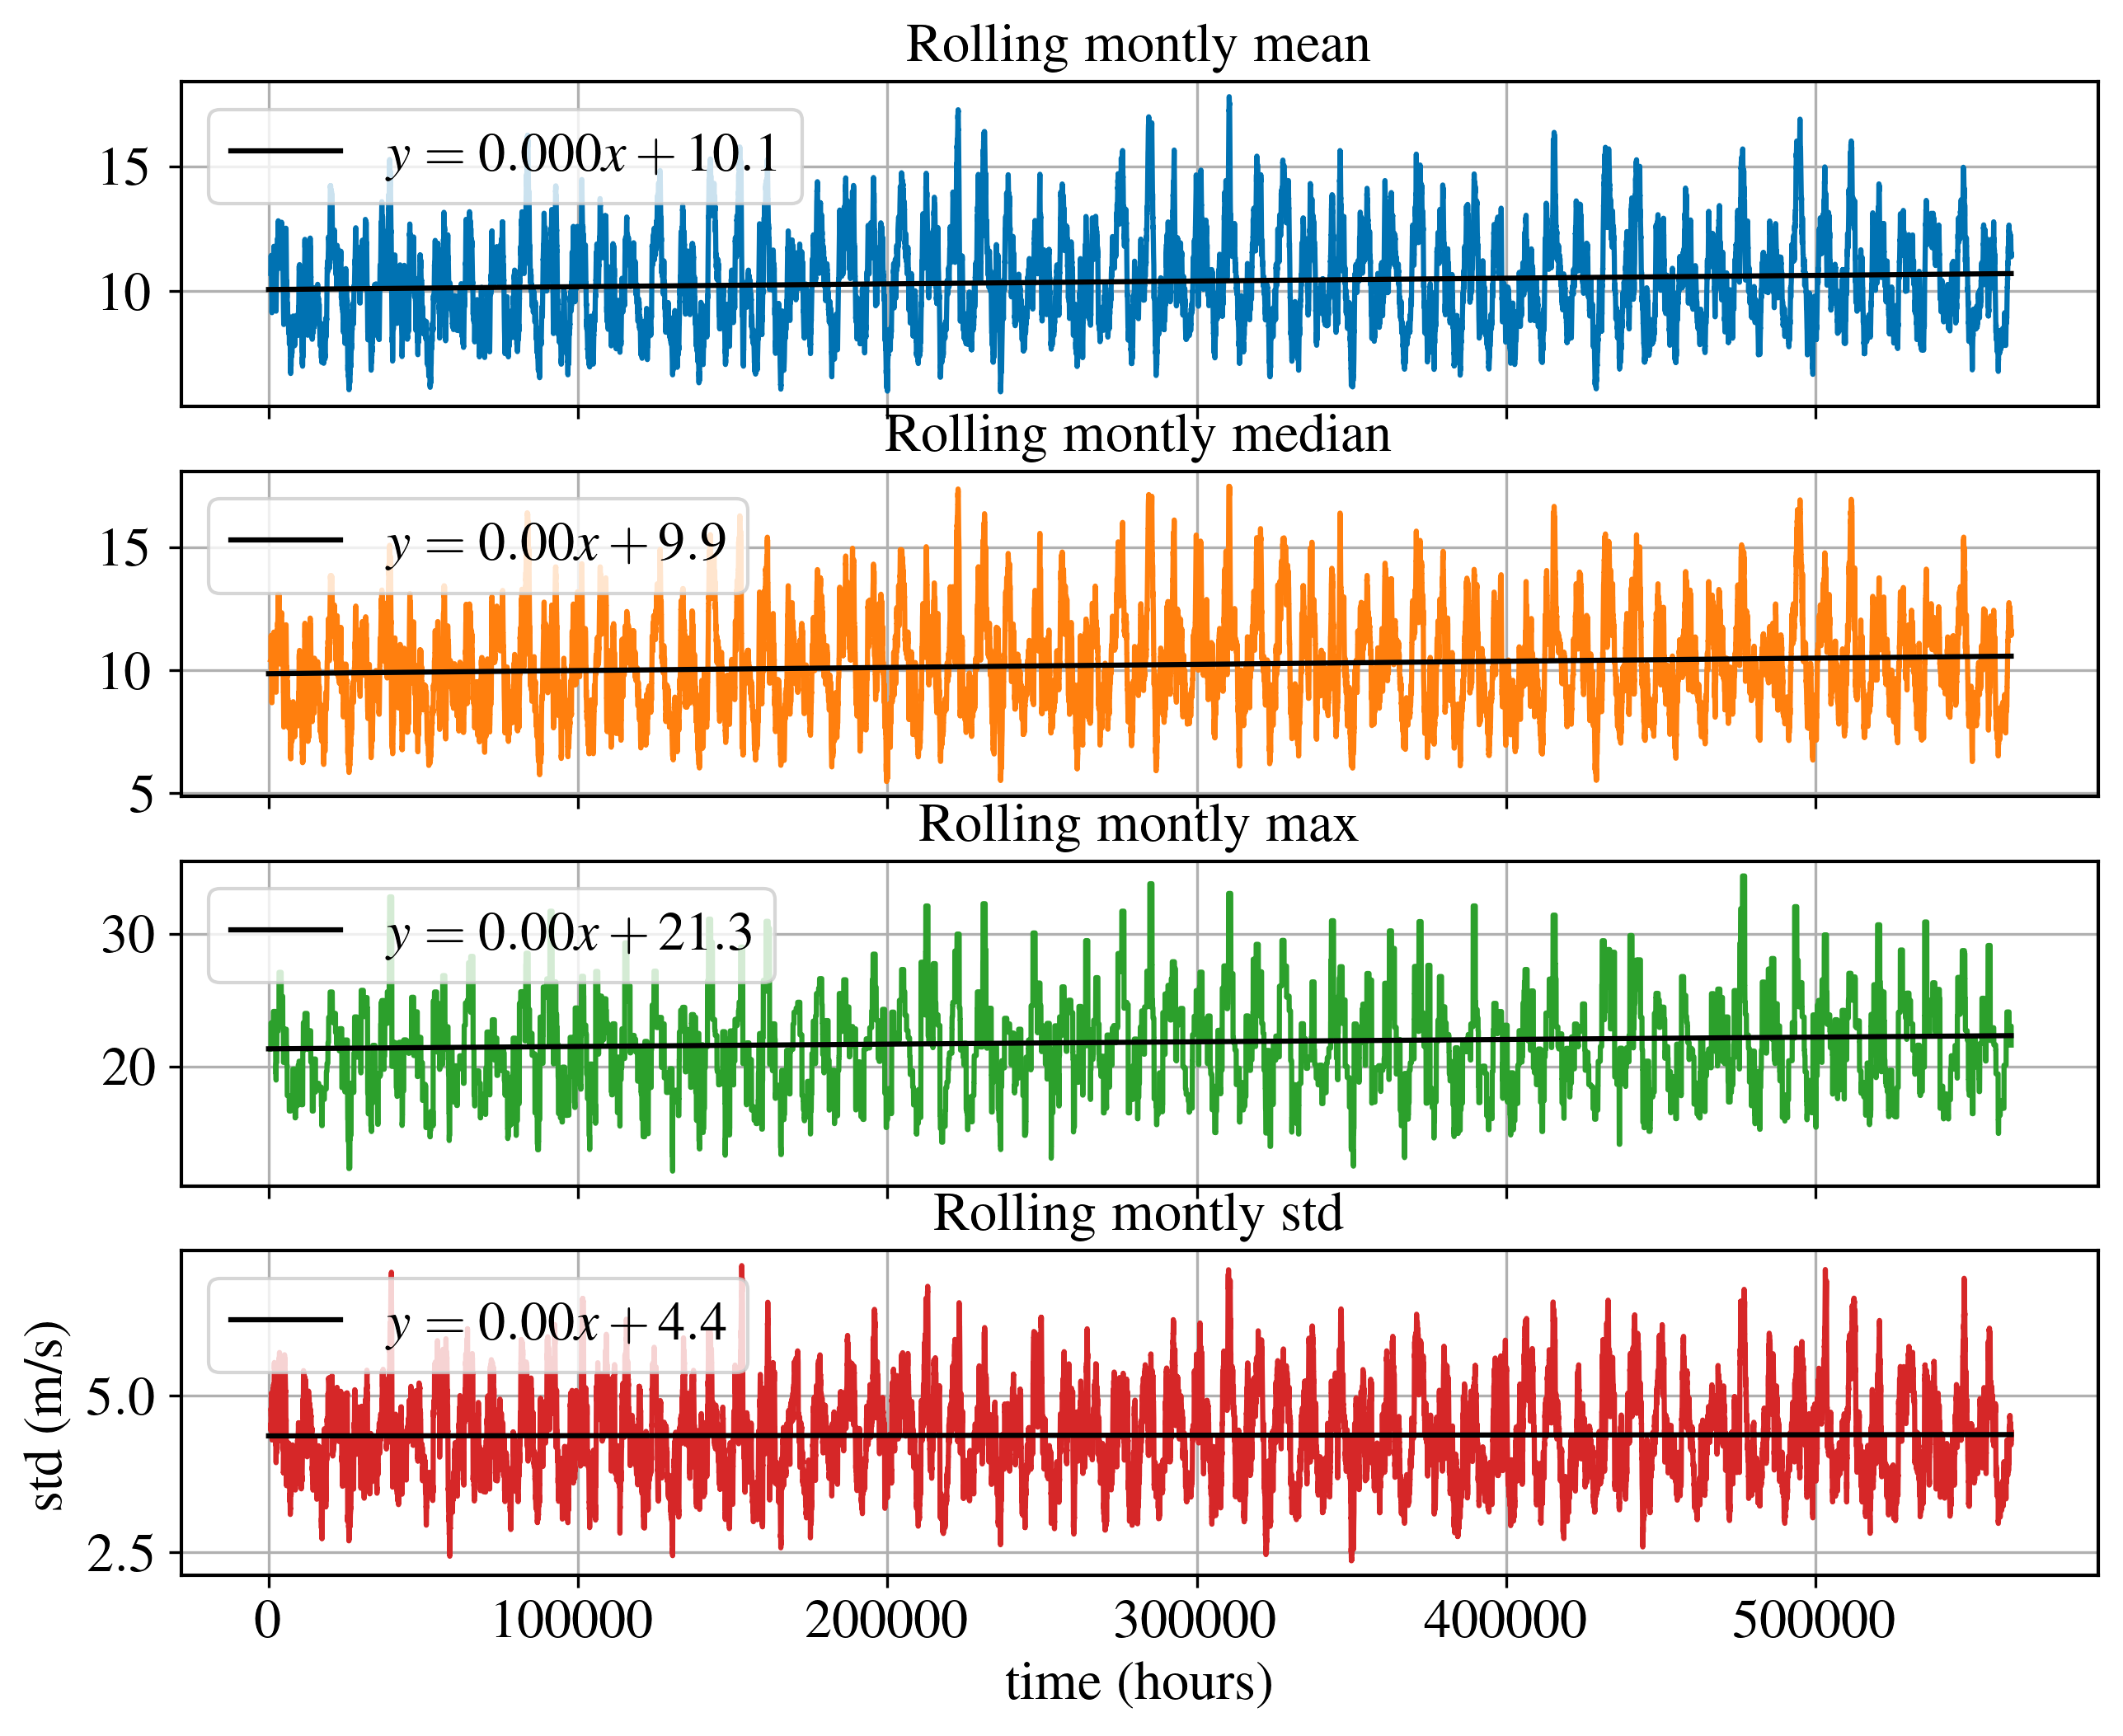

In [60]:
#approach 1 for yearly trend


movMean =   pd.Series(newU[:,indZ]).rolling(int(np.round(720/dt))).mean()
movMedian = pd.Series(newU[:,indZ]).rolling(int(np.round(720/dt))).median()
movMax = pd.Series(newU[:,indZ]).rolling(int(np.round(720/dt))).max()
movStd = pd.Series(newU[:,indZ]).rolling(int(np.round(720/dt))).std()

fig, axs = plt.subplots(4, 1,figsize=(10, 8), sharex=True)
axs[0].plot(t,movMean)
m, b = np.polyfit(t[~np.isnan(movMean)],movMean[~np.isnan(movMean)], deg=1)
myFun = np.poly1d(np.array([m,b])) 
axs[0].plot(t[[0,-1]],myFun(t[[0,-1]]),color='k', label=f'$y = {m:.3f}x {b:+.1f}$')
axs[0].legend()
axs[0].set_title('Rolling montly mean')
axs[0].grid()


axs[1].plot(t,movMedian, 'tab:orange')
axs[1].set_title('Rolling montly median')
m, b = np.polyfit(t[~np.isnan(movMedian)],movMedian[~np.isnan(movMedian)], deg=1)
myFun = np.poly1d(np.array([m,b])) 
axs[1].plot(t[[0,-1]],myFun(t[[0,-1]]),color='k', label=f'$y = {m:.2f}x {b:+.1f}$')
axs[1].legend()
axs[1].grid()

axs[2].plot(t,movMax, 'tab:green')
axs[2].set_title('Rolling montly max')
m, b = np.polyfit(t[~np.isnan(movMax)],movMax[~np.isnan(movMax)], deg=1)
myFun = np.poly1d(np.array([m,b])) 
axs[2].plot(t[[0,-1]],myFun(t[[0,-1]]),color='k', label=f'$y = {m:.2f}x {b:+.1f}$')
axs[2].legend()
axs[2].grid()


axs[3].plot(t,movStd, 'tab:red')
axs[3].set_title('Rolling montly std')
m, b = np.polyfit(t[~np.isnan(movStd)],movStd[~np.isnan(movStd)], deg=1)
myFun = np.poly1d(np.array([m,b])) 
axs[3].plot(t[[0,-1]],myFun(t[[0,-1]]),color='k', label=f'$y = {m:.2f}x {b:+.1f}$')
axs[3].legend()
axs[3].set(xlabel='time (hours)', ylabel='std (m/s)')
axs[3].grid()

plt.savefig("1year_trend.pdf",bbox_inches='tight' )

# No trend visible over the period selected

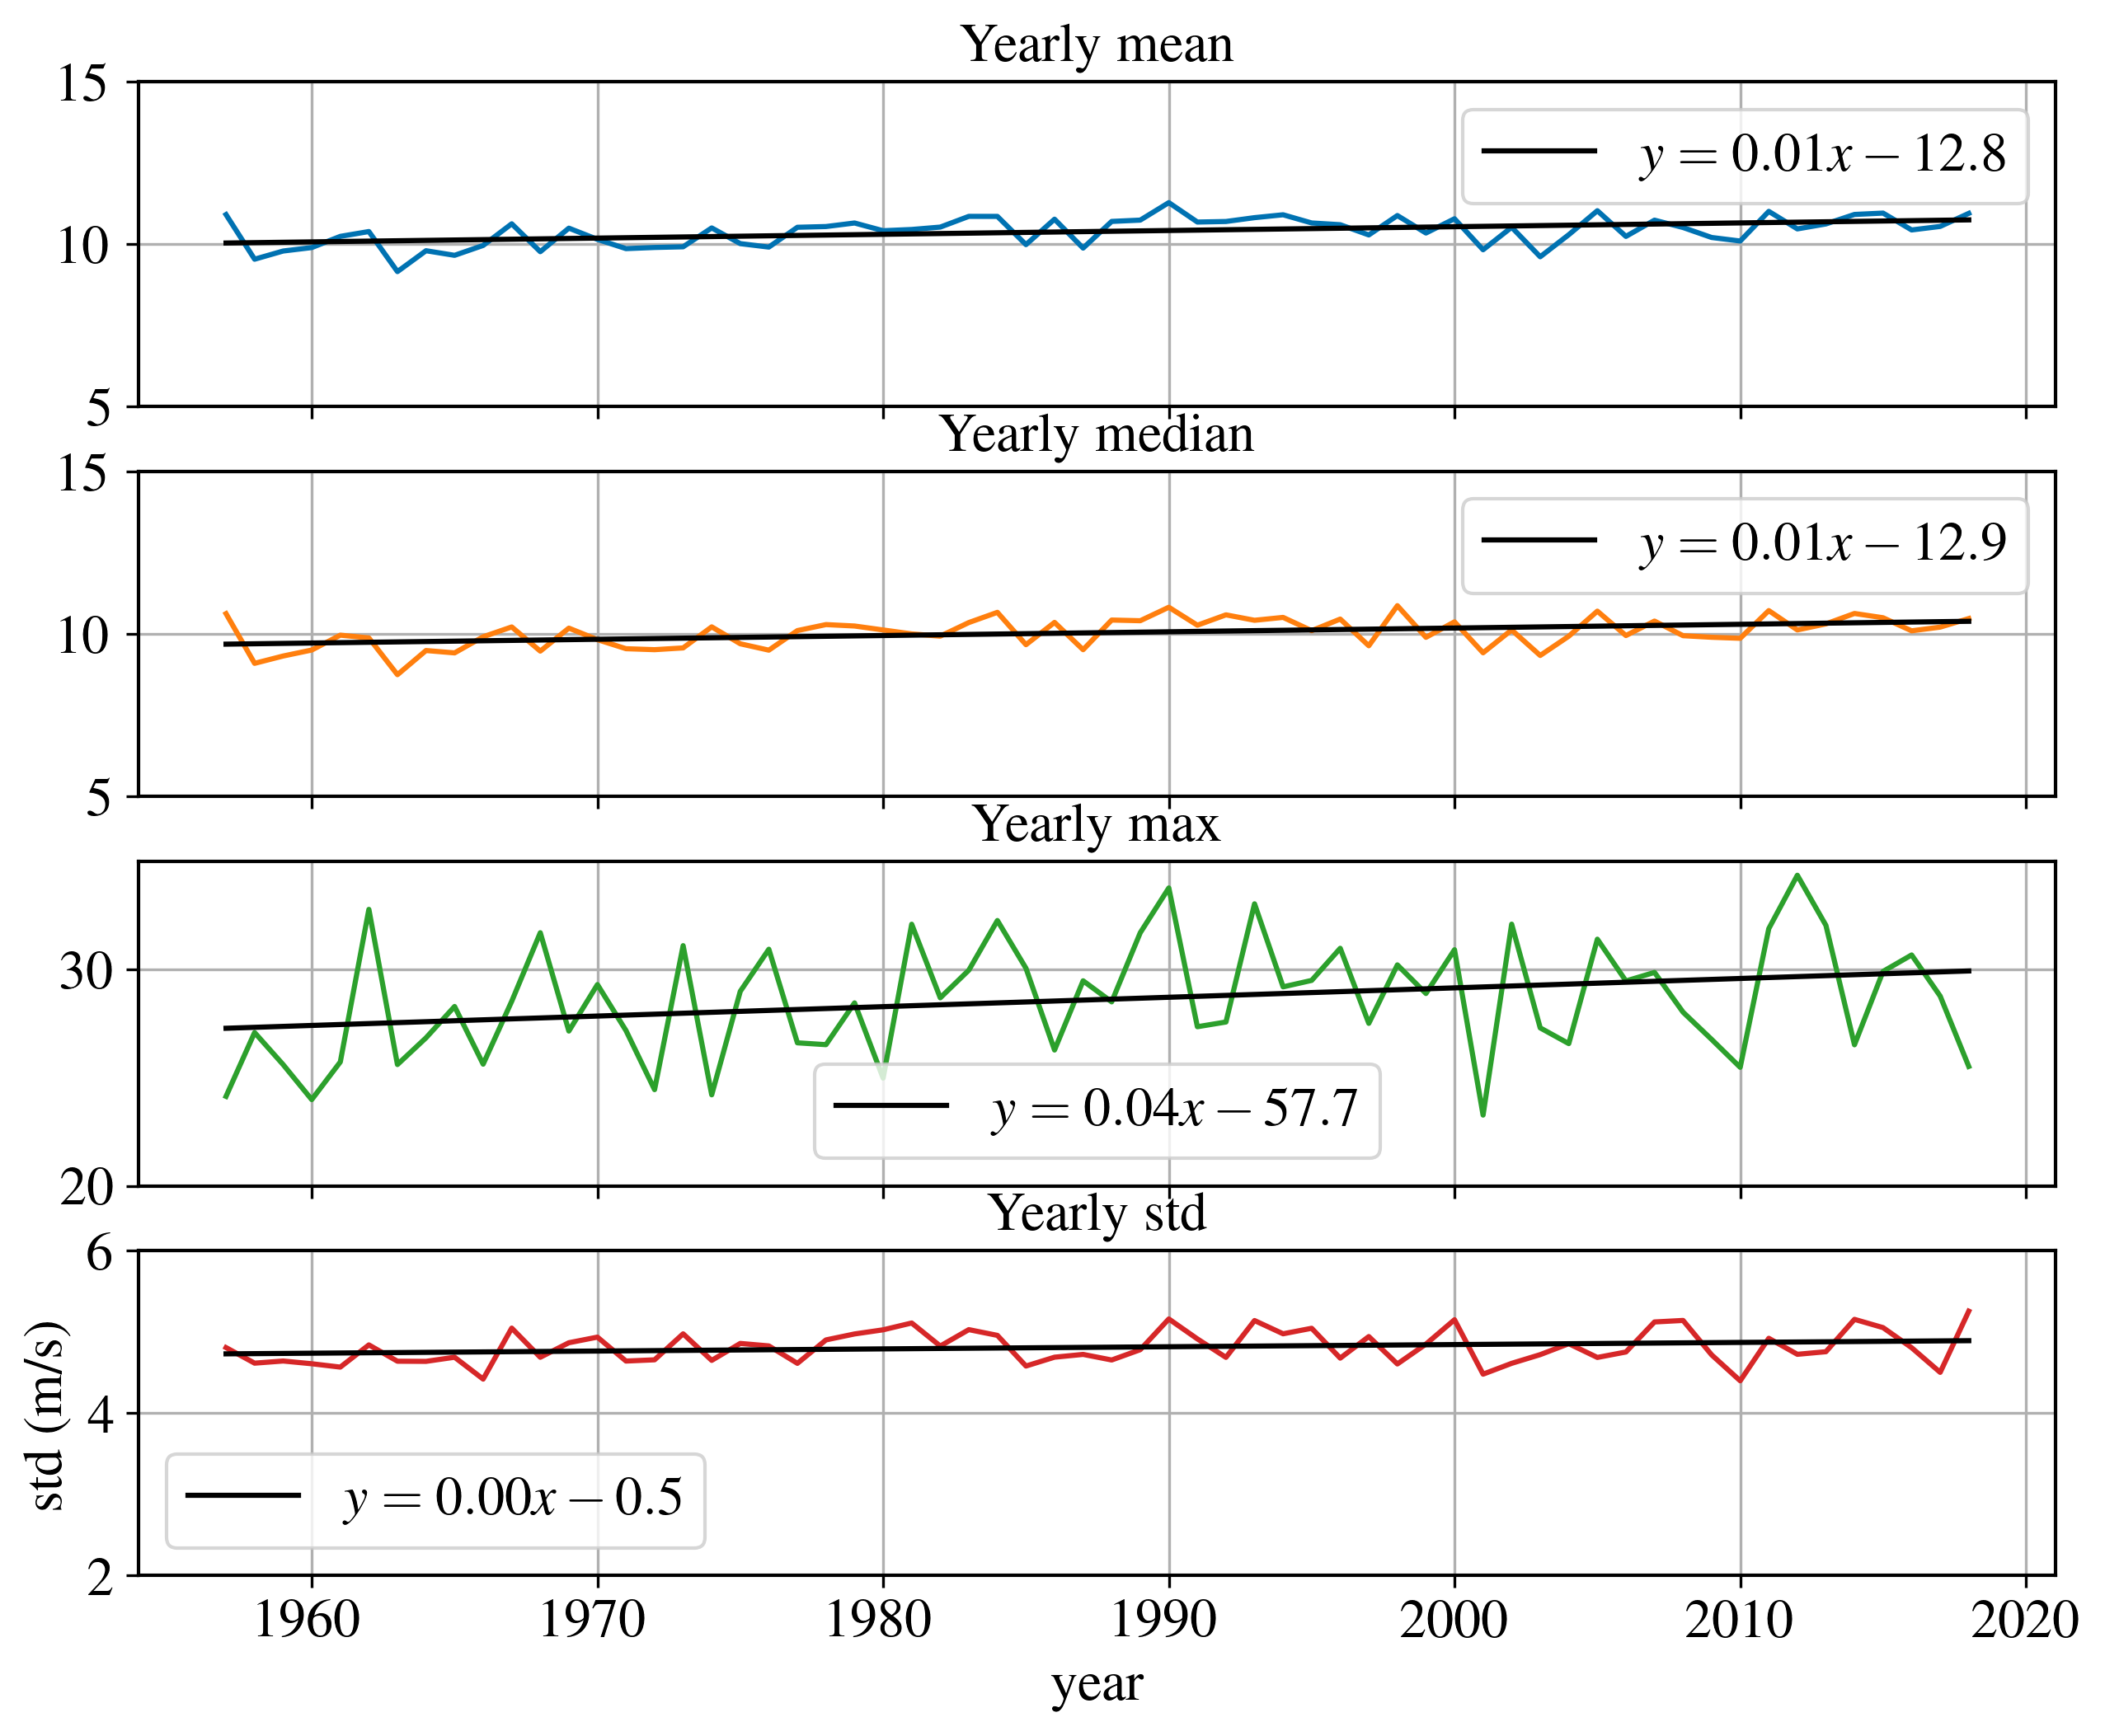

In [61]:
#approach 2 for yearly trend

tYear0 = np.array([pd.DatetimeIndex(time).year])
tYear = np.unique(tYear0)
Nyear =  tYear.size

movMean = np.zeros([Nyear])*np.nan
movMedian = np.zeros([Nyear])*np.nan
movMax = np.zeros([Nyear])*np.nan
movStd = np.zeros([Nyear])*np.nan

for ii in range(0,Nyear):
    
    indYear=np.where(tYear0==tYear[ii])
    indYear = indYear[1]
    movMean[ii] = np.mean(newU[indYear,indZ])
    movMedian[ii] = np.median(newU[indYear,indZ])
    movMax[ii] = np.max(newU[indYear,indZ])
    movStd[ii] = np.std(newU[indYear,indZ])
    

fig, axs = plt.subplots(4, 1,figsize=(10, 8), sharex=True)
axs[0].plot(tYear,movMean)
m, b = np.polyfit(tYear[~np.isnan(movMean)],movMean[~np.isnan(movMean)], deg=1)
myFun = np.poly1d(np.array([m,b])) 
axs[0].plot(tYear[[0,-1]],myFun(tYear[[0,-1]]),color='k', label=f'$y = {m:.2f}x {b:+.1f}$')
axs[0].legend()
axs[0].set_title('Yearly mean')
axs[0].set_ylim([5, 15])
axs[0].grid()

axs[1].plot(tYear,movMedian, 'tab:orange')
axs[1].set_title('Yearly median')
m, b = np.polyfit(tYear[~np.isnan(movMedian)],movMedian[~np.isnan(movMedian)], deg=1)
myFun = np.poly1d(np.array([m,b])) 
axs[1].plot(tYear[[0,-1]],myFun(tYear[[0,-1]]),color='k', label=f'$y = {m:.2f}x {b:+.1f}$')
axs[1].legend()
axs[1].set_ylim([5, 15])
axs[1].grid()

axs[2].plot(tYear,movMax, 'tab:green')
axs[2].set_title('Yearly max')
m, b = np.polyfit(tYear[~np.isnan(movMax)],movMax[~np.isnan(movMax)], deg=1)
myFun = np.poly1d(np.array([m,b])) 
axs[2].plot(tYear[[0,-1]],myFun(tYear[[0,-1]]),color='k', label=f'$y = {m:.2f}x {b:+.1f}$')
axs[2].legend()
axs[2].set_ylim([20, 35])
axs[2].grid()

axs[3].plot(tYear,movStd, 'tab:red')
axs[3].set_title('Yearly std')
m, b = np.polyfit(tYear[~np.isnan(movStd)],movStd[~np.isnan(movStd)], deg=1)
myFun = np.poly1d(np.array([m,b])) 
axs[3].plot(tYear[[0,-1]],myFun(tYear[[0,-1]]),color='k', label=f'$y = {m:.2f}x {b:+.1f}$')
axs[3].legend()
axs[3].set(xlabel='year', ylabel='std (m/s)')
axs[3].set_ylim([2, 6])
axs[3].grid()

plt.savefig("2year_trend.pdf", bbox_inches='tight')

Oppgave 6

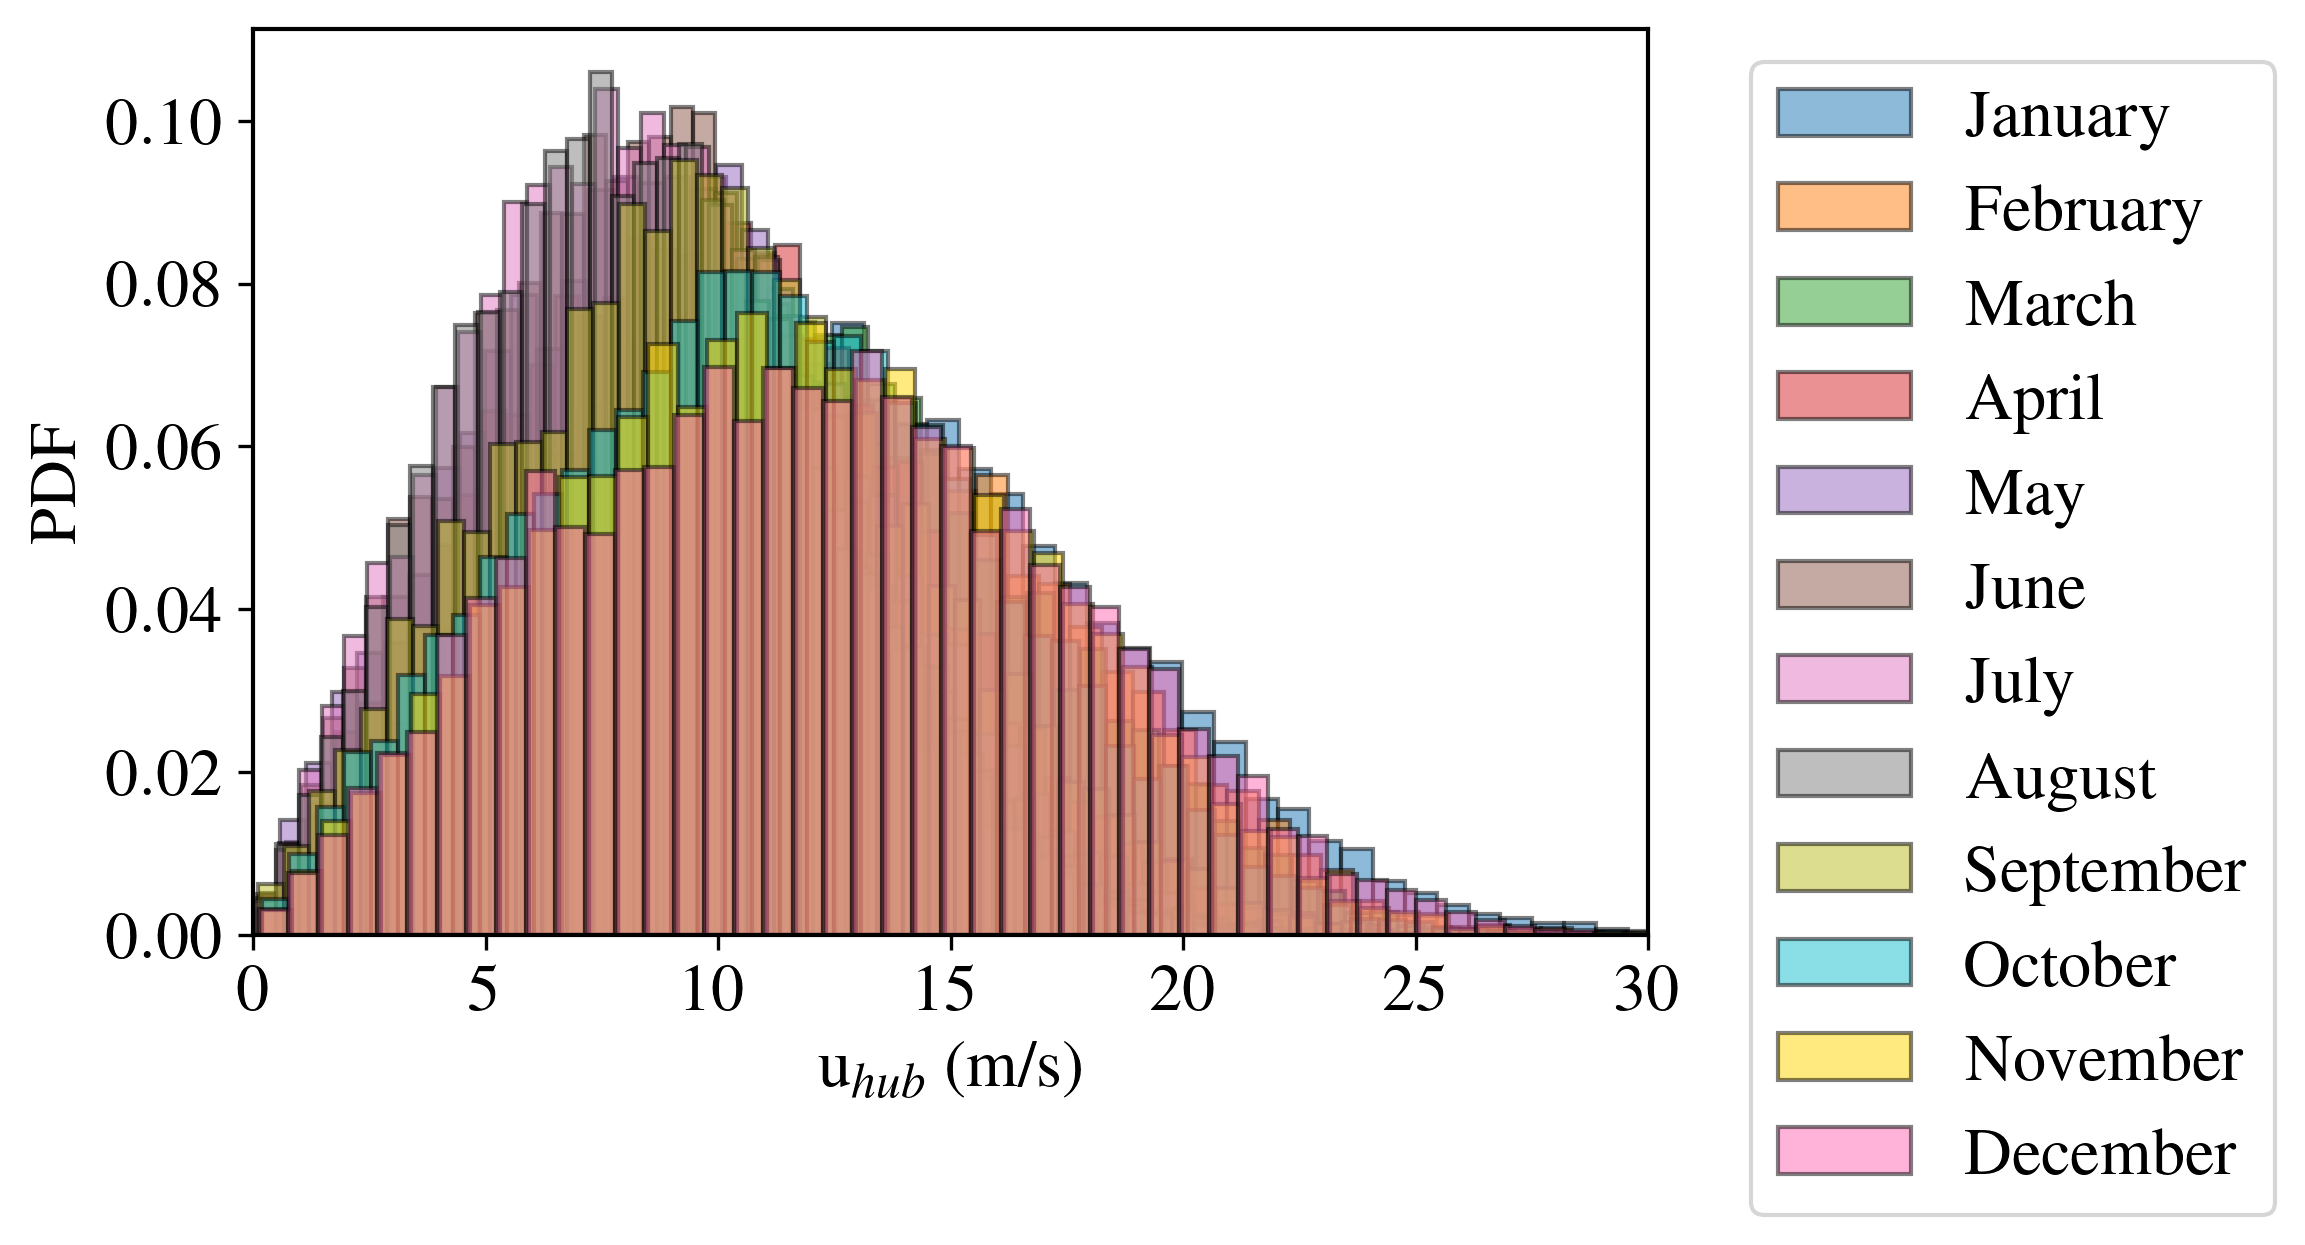

In [104]:
import calendar

# histogram for each month

pd_time = pd.DatetimeIndex(time)

#colors = plt.cm.tab20.colors
#colors = plt.cm.Set1.colors

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
    '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf',
    '#FFD700', '#FF69B4']


fig = plt.figure()
for ii in range(12):
    ind = np.where(pd_time.month == ii + 1)
    u = newU[ind, indZ]
    u = u.transpose()
    myLabel = calendar.month_name[ii + 1]

    # Use modulo to cycle through the colors in the tab10 colormap
    color = colors[ii % len(colors)]

    plt.hist(u, bins=50, label=myLabel,
             density=True, alpha=0.5, edgecolor='black', color=color)

plt.xlim([0, 30])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel("u$_{hub}$ (m/s)", usetex=True)
plt.ylabel("PDF")
plt.savefig("Histogram_monthly.pdf", bbox_inches='tight')
plt.show()




median, mean, sd, 

In [11]:



print(np.mean(u))
print(np.median(u))
print(np.max(u))
print(np.std(u))

12.064869881834335
11.897509445288751
32.03600386235344
5.324855133586963


In [12]:
for ii in range(12):
    print(ii)
    ind = np.where(pd_time.month==ii+1)
    u = newU[ind,indZ]
    print(u.mean(),np.median(u),u.max(),u.std())

    

0
12.407867030239414 12.19556896873643 34.350959535388604 5.365760932311246
1
11.63131352987662 11.291407016934428 33.763951971341704 5.229804197657692
2
11.24702810045154 11.033999521276591 28.599091823708203 4.863555579099182
3
9.768306896620205 9.650364817629178 26.501189600521048 4.3229577670591715
4
9.080898577013029 8.969683704950064 27.6120842596613 4.062530198053752
5
8.68237260389528 8.598666677160224 23.51165680199739 3.8544888627316745
6
8.41160711072358 8.264862206904036 24.513574518019965 3.7581391402459547
7
8.560214306595073 8.302202797438122 24.08398969170646 3.8630426512801153
8
9.912601412083013 9.723117328484584 30.879839659140245 4.4178377562907105
9
11.0656359734856 10.937391706469821 29.474789190186712 4.823669894957099
10
11.74022890941312 11.591080497177586 32.0882546048632 5.020493638844803
11
12.064869881834335 11.897509445288751 32.03600386235344 5.324855133586963


oppgave 7

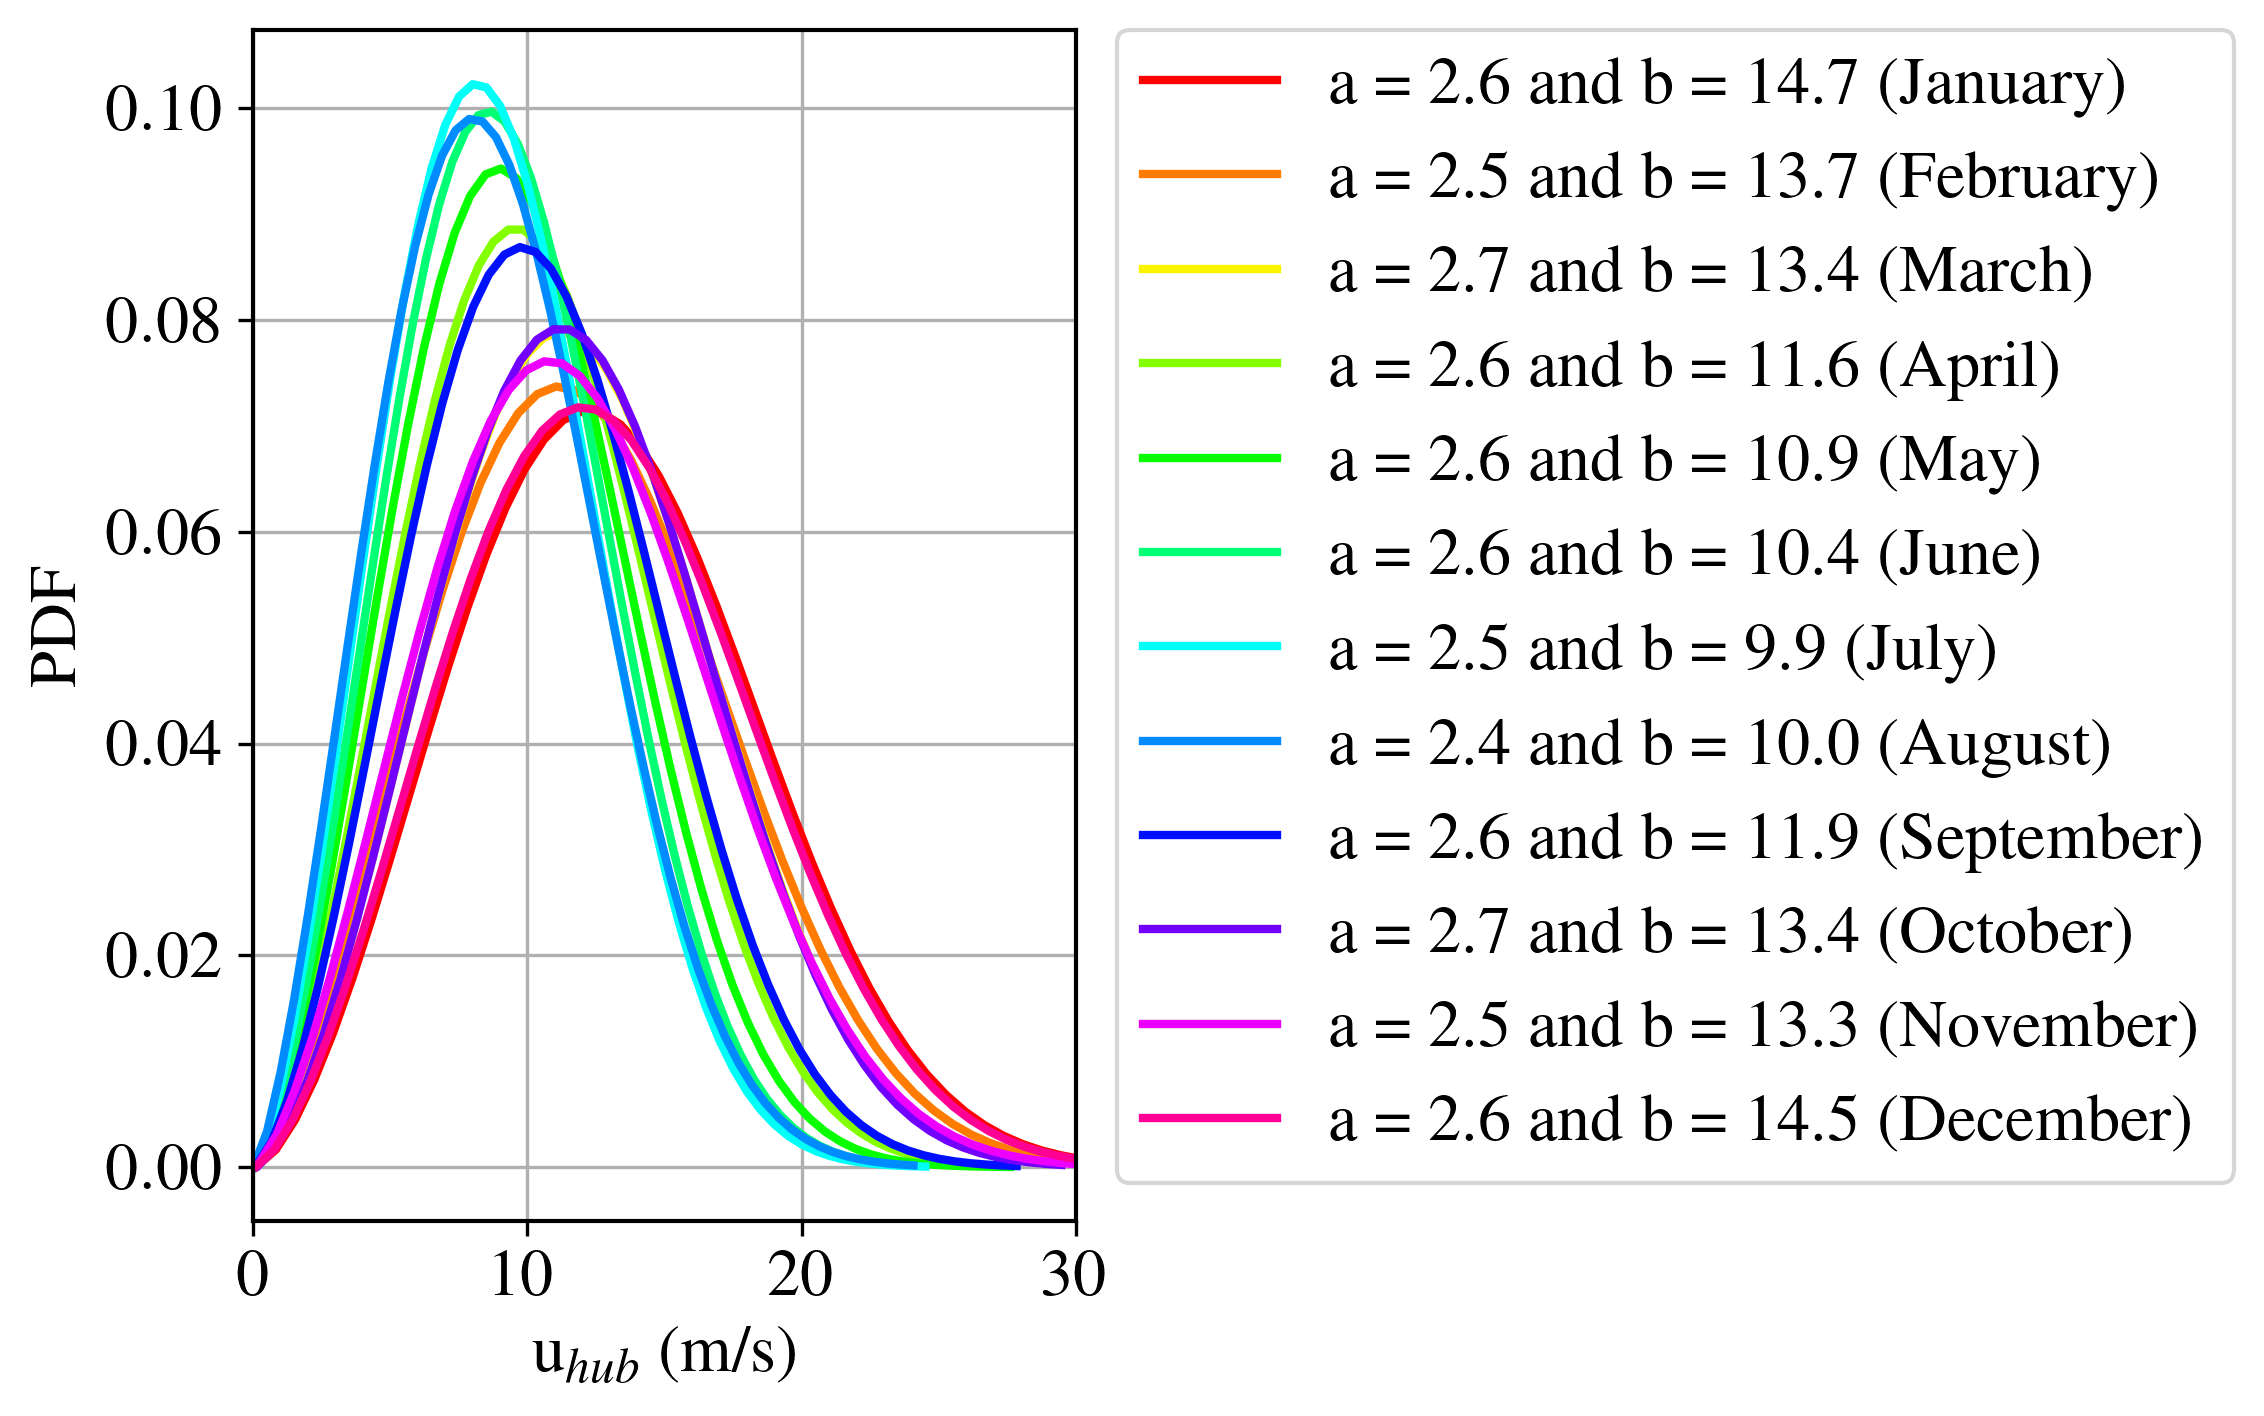

In [67]:
import calendar

#histogram for each month
cmap = plt.cm.hsv



pd_time = pd.DatetimeIndex(time)

fig = plt.figure(figsize=(8,5)) # You can adjust the width (first element) as needed
for ii in range(12):
    color = cmap(ii / 12)


    ind = np.where(pd_time.month == ii + 1)
    u = newU[ind, indZ]
    u = u.transpose()
    params = stats.exponweib.fit(u, loc=0, f0=1)
    a = params[1]
    b = params[3]
    u_pdf = np.linspace(np.min(u), np.max(u), 50)
    myPDF = weibull_min.pdf(u_pdf, a, scale=b)
    myLabel1 = calendar.month_name[ii + 1]
    mylabel2 = "a = {:.1f} and b = {:.1f}".format(a, b)
    plt.plot(u_pdf, myPDF, color=color, linewidth=2, label=mylabel2 + ' (' + myLabel1 + ')')
    plt.grid(visible=1)
plt.xlim([0, 30])

# Moving the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.xlabel("u$_{hub}$ (m/s)", usetex=True)
plt.ylabel("PDF")
plt.tight_layout()  # Adjust the layout to accommodate the legend
plt.savefig("Weibull_histogram_monthly.pdf", bbox_inches='tight')
plt.show()

Oppgave 8

2016-01-23 00:00:00
2016-04-11 21:00:00
2016-07-01 12:00:00
2015-11-25 12:00:00
2016-01-23 00:00:00
2016-04-11 21:00:00
2016-07-01 12:00:00
2015-11-25 12:00:00


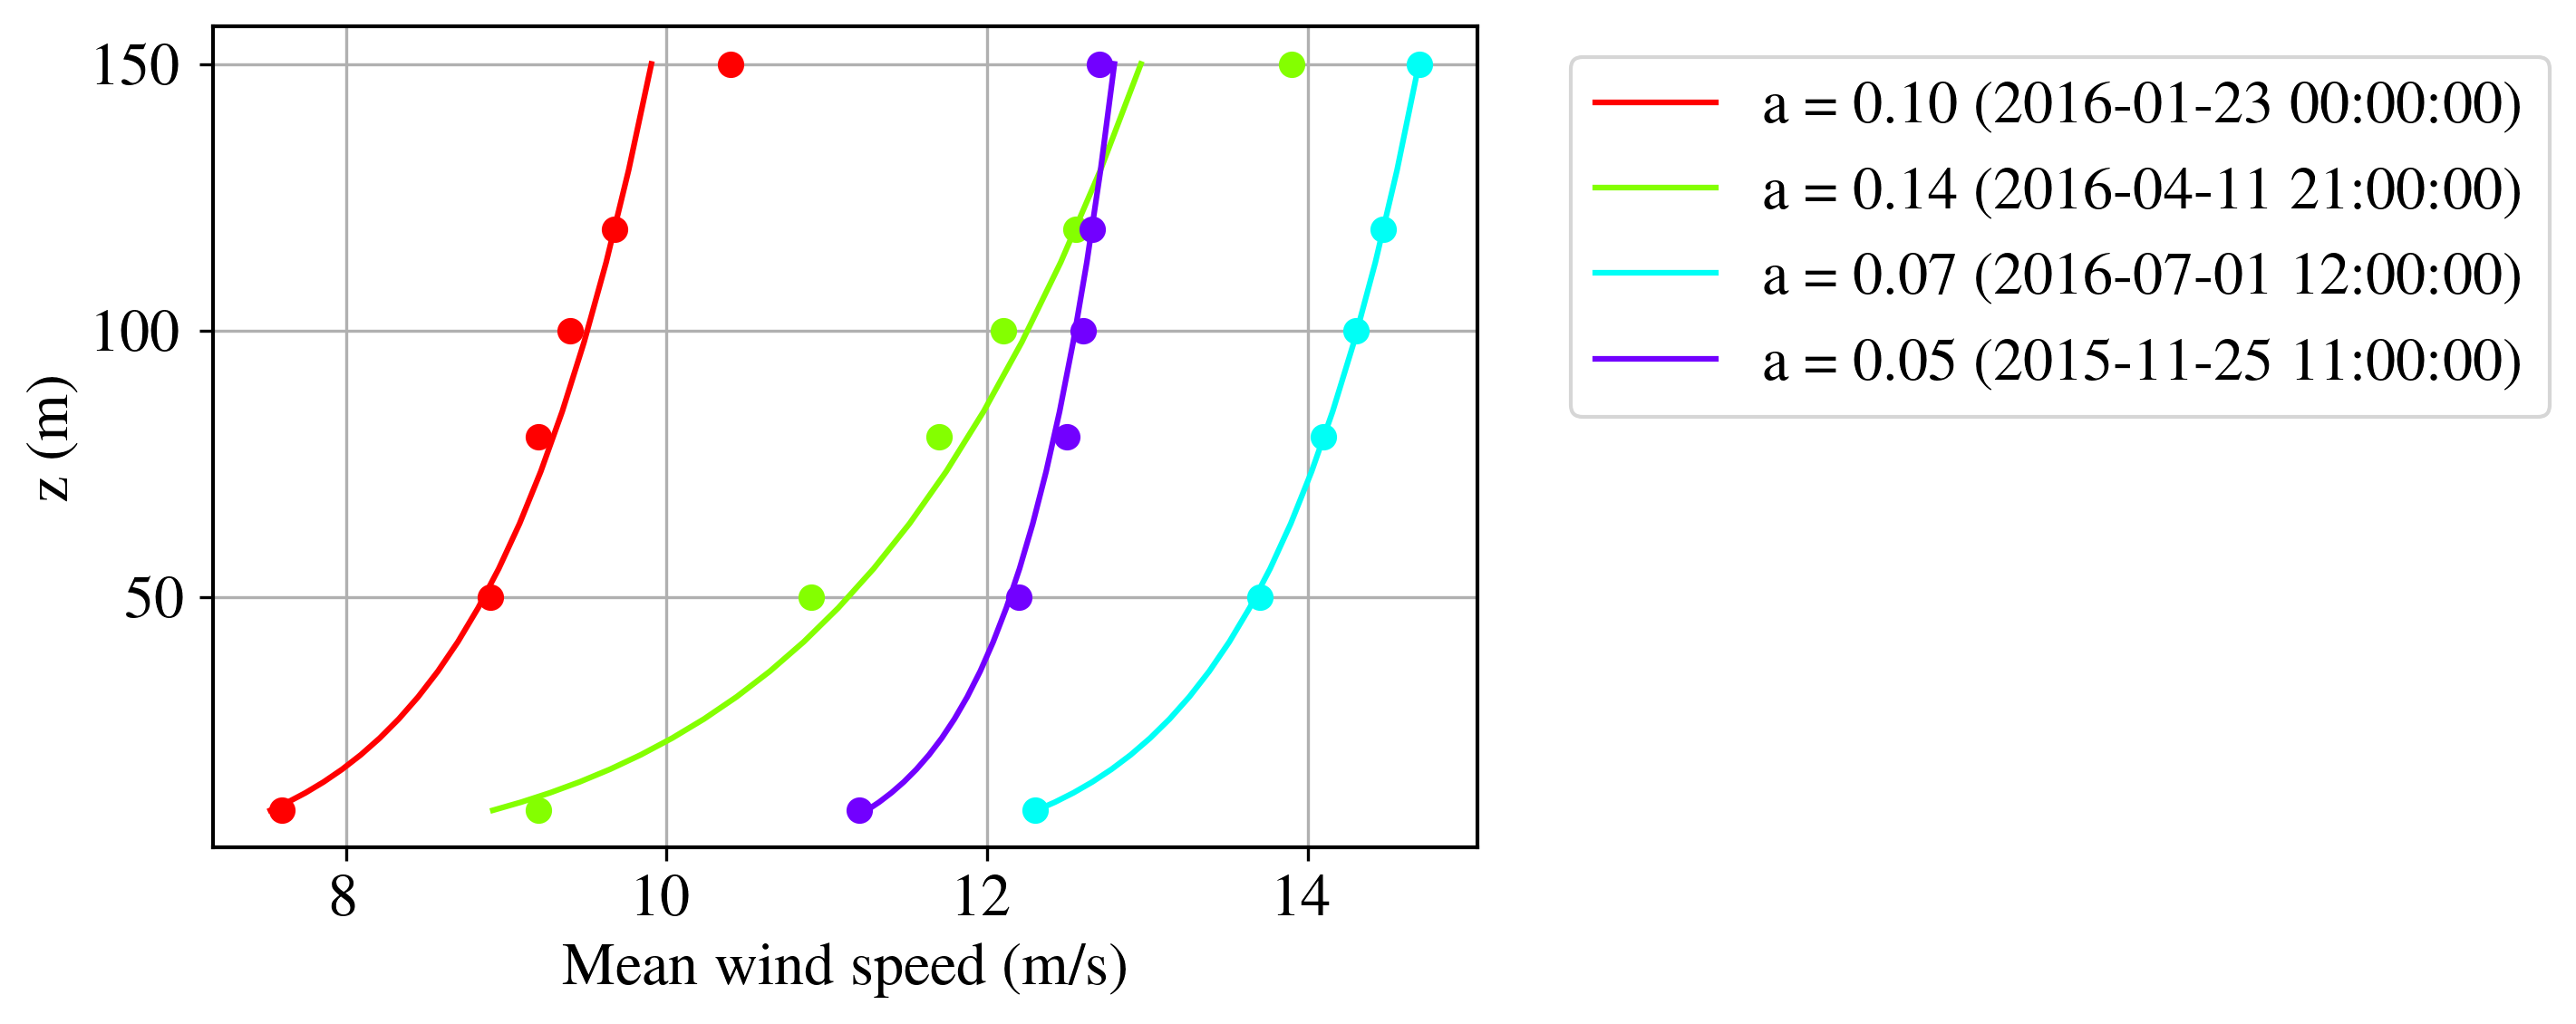

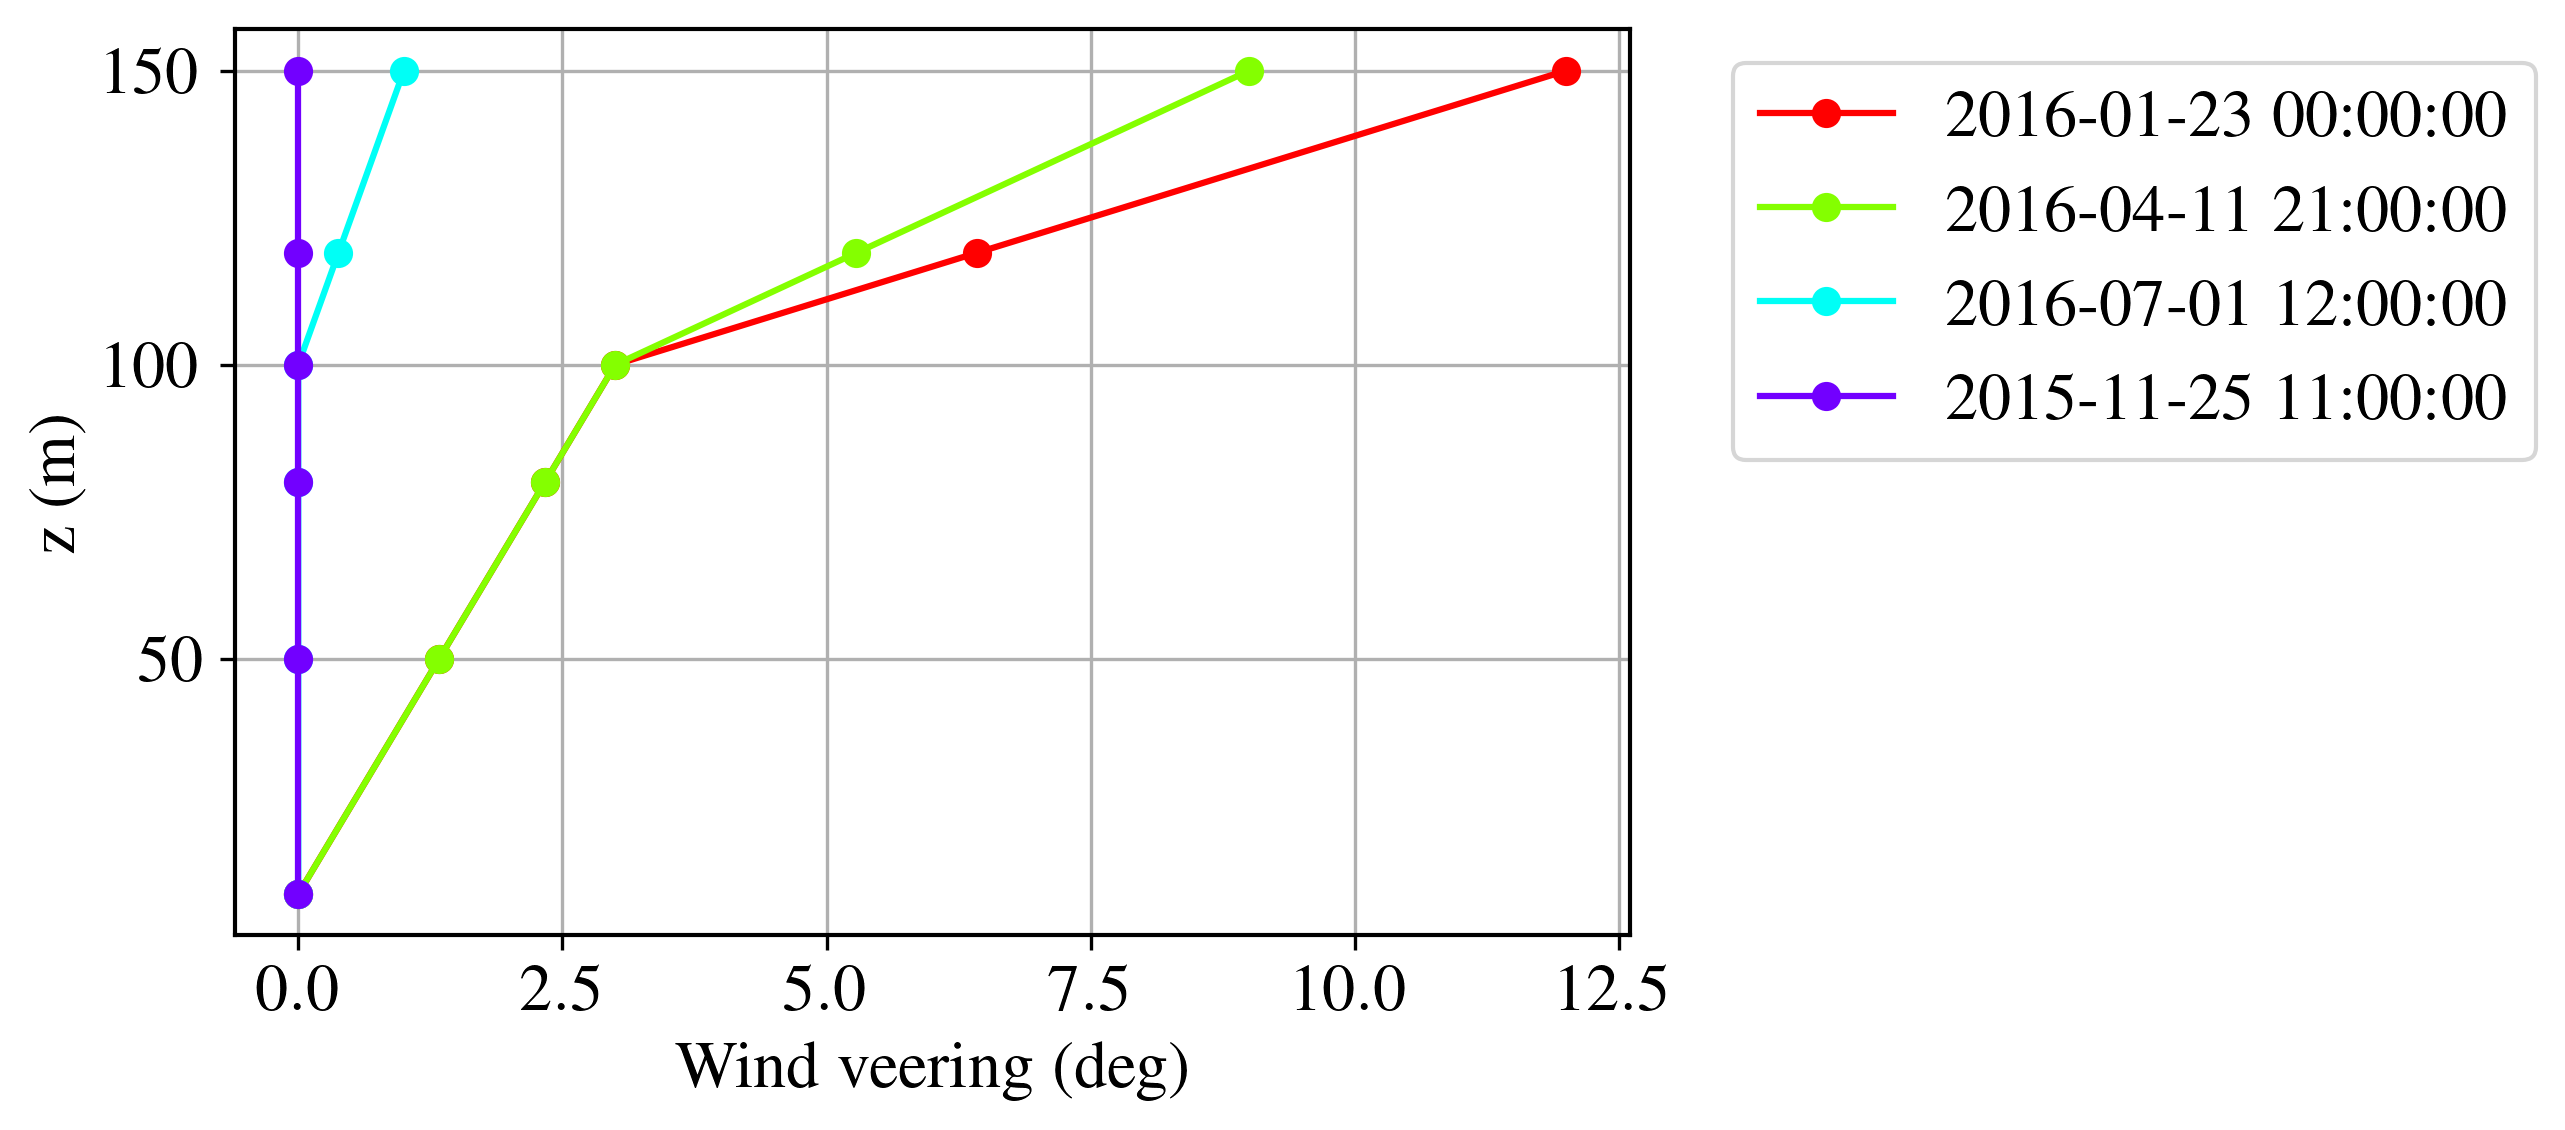

In [14]:
from scipy.optimize import curve_fit

d = pd.to_datetime(['2016-01-23 00:00','2016-04-11 21:00','2016-07-01 12:00','2015-11-25 11:00'])

def func(zr, a):
    ur = zr**a    
    return ur

def powerLaw(zHub,uHub,z, a):
    u = uHub*(z/zHub)**a    
    return u

cmap = plt.cm.hsv

# Power law check
fig = plt.figure()
for ii in range(len(d)):
    
    color = cmap(ii/len(d))  
    
    indTime  =  np.argmin(np.abs(pd_time-d[ii]))
    print(pd_time[indTime])
    plt.plot(newU[indTime,:],newZ,'o', color = color)
    
    ur = newU[indTime,:]/newU[indTime,indZ]
    zr = newZ/zHub
    alpha,dummy = curve_fit(func, zr,ur, bounds=(0, 1))
    mylabel2="a =  {:.2f}".format(float(alpha))
    myLabel1 = str(d[ii])

    z1 = np.logspace(np.log10(newZ[0]),np.log10(newZ[-1]),20)
    plt.plot(powerLaw(zHub,newU[indTime,indZ],z1,alpha),z1, color = color, label = mylabel2 + ' (' + myLabel1 + ')' )
    
    
plt.grid()    
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel("Mean wind speed (m/s)")
plt.ylabel("z (m)")
plt.savefig("powerLaw.pdf", bbox_inches='tight')

# Wind veer check
fig = plt.figure()
for ii in range(len(d)):
    
    color = cmap(ii/len(d))  
    
    indTime  =  np.argmin(np.abs(pd_time-d[ii]))
    print(pd_time[indTime])
    myLabel1 = str(d[ii])
    plt.plot(newDir[indTime,:]-newDir[indTime,0],newZ,'o-', color = color, label = myLabel1 )
    
    
    
plt.grid()    
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel("Wind veering (deg)")
plt.ylabel("z (m)")
plt.savefig("wind_veer.pdf", bbox_inches='tight')




# The power coefficient is lower than usually modelled offshore, which is 0.11


Oppgave 9

In [15]:
# Air sea temperature difference

s = pd.read_csv('NORA10_T_5674N_0501E.txt', header=2, sep='\s+')

T100 = s["T100"]
SST = s["SST"]

s = np.array(s)
N = np.size(s[:,1])
t1=  datetime(int(s[0,0]),int(s[0,1]),int(s[0,2]),int(s[0,3]))
t2=  datetime(int(s[-1,0]),int(s[-1,1]),int(s[-1,2]),int(s[-1,3]))  
time = np.arange(t1,t2 + timedelta(hours=3) ,np.timedelta64(3, 'h'))
pd_time = pd.DatetimeIndex(time)

for ii in range(len(d)):
    indTime  =  np.argmin(np.abs(pd_time-d[ii]))
    dTemp = T100[indTime] - SST[indTime]
    mylabel = "On "+ str(pd_time[indTime]) + ", DT = {:.2f} degC".format(float(dTemp))
    if dTemp>0:
        print('The atmosphere is statically stable')
    else:
        print('The atmosphere is statically unstable')
        
    print(mylabel)

The atmosphere is statically stable
On 2016-01-23 00:00:00, DT = 0.10 degC
The atmosphere is statically stable
On 2016-04-11 21:00:00, DT = 1.00 degC
The atmosphere is statically unstable
On 2016-07-01 12:00:00, DT = -1.20 degC
The atmosphere is statically unstable
On 2015-11-25 12:00:00, DT = -2.90 degC
